# Traitement des données qui concerne le polluant PM10

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Importer la fonction depuis le fichier Python
from PM10 import fetch_and_process_pm10_data

# Utilisation de la fonction importée
dfPM10 = fetch_and_process_pm10_data()

# Vérifier si le DataFrame a été correctement récupéré et traité
if dfPM10 is not None:
    # Afficher les premières lignes du DataFrame dfPM10 pour vérifier les modifications
    print(dfPM10.head())

    # Afficher les types de colonnes pour vérifier les conversions
    print(dfPM10.dtypes)


                                  id code_polluant code_point_de_prelevement  \
0  2023-12-01 00:00:00FR23003_PM10_1            24              FR23003_PM10   
1  2023-12-01 00:00:00FR23068_PM10_4            24              FR23068_PM10   
2  2023-12-01 00:00:00FR23070_PM10_3            24              FR23070_PM10   
3  2023-12-01 00:00:00FR23078_PM10_2            24              FR23078_PM10   
4  2023-12-01 00:00:00FR23107_PM10_4            24              FR23107_PM10   

  code_station               nom_station               nom_commune  \
0      FR23003              LA MEGRETAIS                    Donges   
1      FR23068                   FROSSAY                   Frossay   
2      FR23070  SAINT ETIENNE DE MONTLUC  Saint-Etienne-De-Montluc   
3      FR23078             SAINT EXUPERY                    Cholet   
4      FR23107            LA CHAUVINIERE                    Nantes   

  code_commune departement_code   departement_nom  code_zone_affichage  \
0        44052          

## Comparaison avec les valeurs de seuils
Nous faisons le choix dans un premier temps de ne traiter que les données mensuelles, en prenant en granularité les données mensuelles, de manière à comparer les trimestres des différentes années

In [8]:
# Définition des seuils pour les particules PM10 en µg/m3
OBJECTIF_QUALITE_PM10 = 30  # en moyenne annuelle
VALEUR_LIMITE_ANNUELLE_PM10 = 40  # en moyenne annuelle

# Afficher les seuils définis
print(f"Objectif de qualité PM10 : {OBJECTIF_QUALITE_PM10} µg/m3 (en moyenne annuelle)")
print(f"Valeur limite annuelle PM10 : {VALEUR_LIMITE_ANNUELLE_PM10} µg/m3 (en moyenne annuelle)")


Objectif de qualité PM10 : 30 µg/m3 (en moyenne annuelle)
Valeur limite annuelle PM10 : 40 µg/m3 (en moyenne annuelle)


Création d'une variable cible qui vaut 1 si la valeur est supérieure au seuil et 0 sinon
On ajoute ces colonnes au dataframe

In [9]:
# Convertir les colonnes de date en format datetime
dfPM10['date_heure_tu'] = pd.to_datetime(dfPM10['date_heure_tu'])

# Ajouter des colonnes de comparaison avec les seuils (variable cible)
dfPM10['cible_objectif_qualite_PM10'] = (dfPM10['valeur'] > OBJECTIF_QUALITE_PM10).astype(int)
dfPM10['cible_valeur_limite_annuelle_PM10'] = (dfPM10['valeur'] > VALEUR_LIMITE_ANNUELLE_PM10).astype(int)

# Afficher les premières lignes du DataFrame avec les nouvelles colonnes de comparaison
print(dfPM10.head())

# Sauvegarder le DataFrame avec les nouvelles colonnes de comparaison
dfPM10.to_pickle('PM10_with_comparison.pkl')


                                  id code_polluant code_point_de_prelevement  \
0  2023-12-01 00:00:00FR23003_PM10_1            24              FR23003_PM10   
1  2023-12-01 00:00:00FR23068_PM10_4            24              FR23068_PM10   
2  2023-12-01 00:00:00FR23070_PM10_3            24              FR23070_PM10   
3  2023-12-01 00:00:00FR23078_PM10_2            24              FR23078_PM10   
4  2023-12-01 00:00:00FR23107_PM10_4            24              FR23107_PM10   

  code_station               nom_station               nom_commune  \
0      FR23003              LA MEGRETAIS                    Donges   
1      FR23068                   FROSSAY                   Frossay   
2      FR23070  SAINT ETIENNE DE MONTLUC  Saint-Etienne-De-Montluc   
3      FR23078             SAINT EXUPERY                    Cholet   
4      FR23107            LA CHAUVINIERE                    Nantes   

   code_commune  departement_code   departement_nom  code_zone_affichage  \
0         44052       

### Distribution des variables cibles : 

In [10]:
# Afficher le nombre de valeurs 0 et 1 dans la colonne 'cible_objectif_qualite_PM10'
print(dfPM10['cible_objectif_qualite_PM10'].value_counts())
print(dfPM10['cible_valeur_limite_annuelle_PM10'].value_counts())


cible_objectif_qualite_PM10
0    684
Name: count, dtype: int64
cible_valeur_limite_annuelle_PM10
0    684
Name: count, dtype: int64


Observations : 
- On remarque ici qu'aucune valeur ne dépasse le seuil, nous avons donc fait le choix de modifier ce dernier de manière arbitraire pour rendre l'exercice plus intéressant, toutes les valeurs seront donc divisées par 2
- De plus pour visualiser les résultats par mois, on décide de créer une valeur de seuil mensuelle nommé "OBJECTIF_QUALITE_PM10_MENSUEL" et qui aura pour valeur 35 (car la moyenne annuelle étant à 30 et la valeur limite annuelle étant à 40 on prend l'entre deux) qu'on va venir diviser par 2 pour avoir des résultats, on va prendre 18 pour arrondir à la valeur au-dessus

In [11]:
# Définition des nouveaux seuils pour les particules PM10 en µg/m3
OBJECTIF_QUALITE_PM10 = 15  # en moyenne annuelle
VALEUR_LIMITE_ANNUELLE_PM10 = 20  # en moyenne annuelle
OBJECTIF_QUALITE_PM10_MENSUEL = 18 #en moyenne mensuelle

# Afficher les nouveaux seuils définis
print(f"Objectif de qualité PM10 : {OBJECTIF_QUALITE_PM10} µg/m3 (en moyenne annuelle)")
print(f"Valeur limite annuelle PM10 : {VALEUR_LIMITE_ANNUELLE_PM10} µg/m3 (en moyenne annuelle)")
print(f"Objectif de qualité PM10 mensuelle : {OBJECTIF_QUALITE_PM10_MENSUEL} µg/m3 (en moyenne mensuelle)")

Objectif de qualité PM10 : 15 µg/m3 (en moyenne annuelle)
Valeur limite annuelle PM10 : 20 µg/m3 (en moyenne annuelle)
Objectif de qualité PM10 mensuelle : 18 µg/m3 (en moyenne mensuelle)


In [12]:
# Convertir les colonnes de date en format datetime
dfPM10['date_heure_tu'] = pd.to_datetime(dfPM10['date_heure_tu'])

# Ajouter des colonnes de comparaison avec les seuils (variable cible)
dfPM10['cible_objectif_qualite_PM10'] = (dfPM10['valeur'] > OBJECTIF_QUALITE_PM10).astype(int)
dfPM10['cible_valeur_limite_annuelle_PM10'] = (dfPM10['valeur'] > VALEUR_LIMITE_ANNUELLE_PM10).astype(int)
dfPM10['cible_objectif_qualite_PM10_mensuelle'] = (dfPM10['valeur'] > OBJECTIF_QUALITE_PM10_MENSUEL).astype(int)

# Afficher les premières lignes du DataFrame avec les nouvelles colonnes de comparaison
print(dfPM10.head())

# Sauvegarder le DataFrame avec les nouvelles colonnes de comparaison
dfPM10.to_pickle('PM10_with_comparison.pkl')

                                  id code_polluant code_point_de_prelevement  \
0  2023-12-01 00:00:00FR23003_PM10_1            24              FR23003_PM10   
1  2023-12-01 00:00:00FR23068_PM10_4            24              FR23068_PM10   
2  2023-12-01 00:00:00FR23070_PM10_3            24              FR23070_PM10   
3  2023-12-01 00:00:00FR23078_PM10_2            24              FR23078_PM10   
4  2023-12-01 00:00:00FR23107_PM10_4            24              FR23107_PM10   

  code_station               nom_station               nom_commune  \
0      FR23003              LA MEGRETAIS                    Donges   
1      FR23068                   FROSSAY                   Frossay   
2      FR23070  SAINT ETIENNE DE MONTLUC  Saint-Etienne-De-Montluc   
3      FR23078             SAINT EXUPERY                    Cholet   
4      FR23107            LA CHAUVINIERE                    Nantes   

   code_commune  departement_code   departement_nom  code_zone_affichage  \
0         44052       

In [13]:
# Afficher le nombre de valeurs 0 et 1 dans la colonne 'cible_objectif_qualite_PM10'
print(dfPM10['cible_objectif_qualite_PM10'].value_counts())
print(dfPM10['cible_valeur_limite_annuelle_PM10'].value_counts())
print(dfPM10['cible_objectif_qualite_PM10_mensuelle'].value_counts())


cible_objectif_qualite_PM10
0    393
1    291
Name: count, dtype: int64
cible_valeur_limite_annuelle_PM10
0    615
1     69
Name: count, dtype: int64
cible_objectif_qualite_PM10_mensuelle
0    550
1    134
Name: count, dtype: int64


Observations : 
- Les variables cible_objectif_qualite_PM10 et cible_objectif_qualite_PM10_mensuelle sont plutot équilibrés, il y à donc un problème sur l'objectif qualité PM10, avec beaucoup d'alertes
- La variable cible_valeur_limite_annuelle_PM10 est plutot déséquilibré, l'indice semble donc plutôt correcte.

## Visualisation des données par des graphiques

#### Graphique pour voir par année, et par département quand est-ce qu'on à dépassé le seuil de cible_objectif_qualité_PM10 (valeur de seuil = 15, en rouge quand depassé)


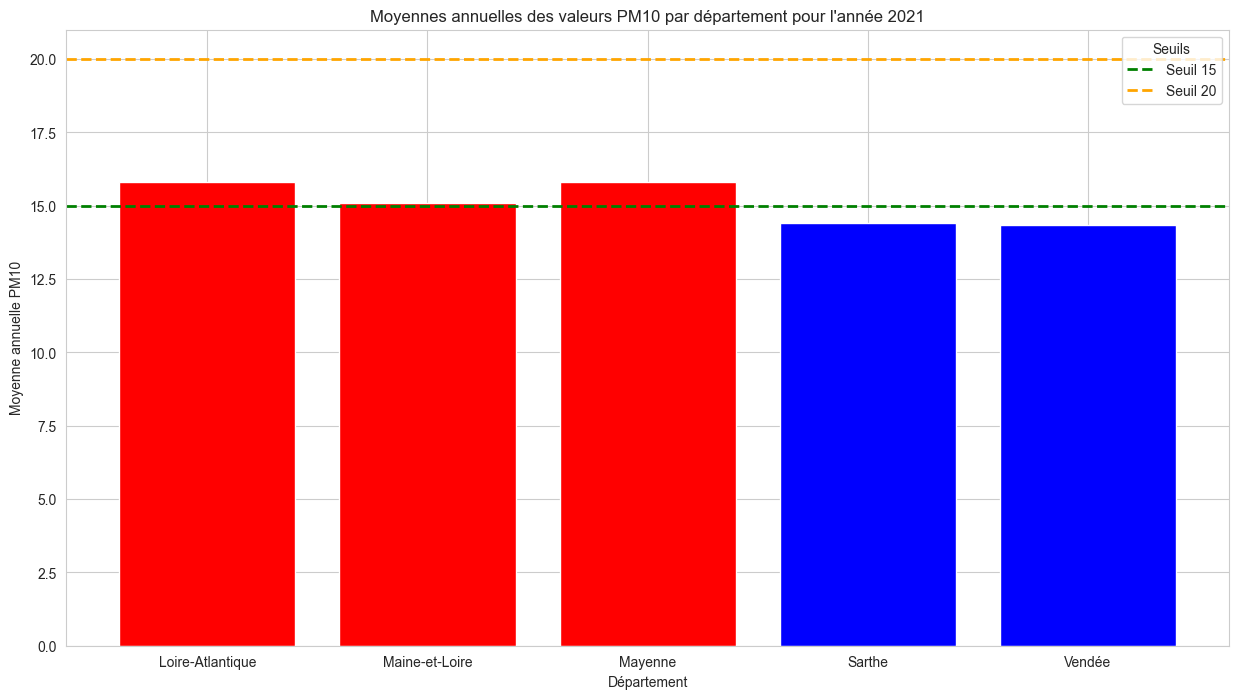

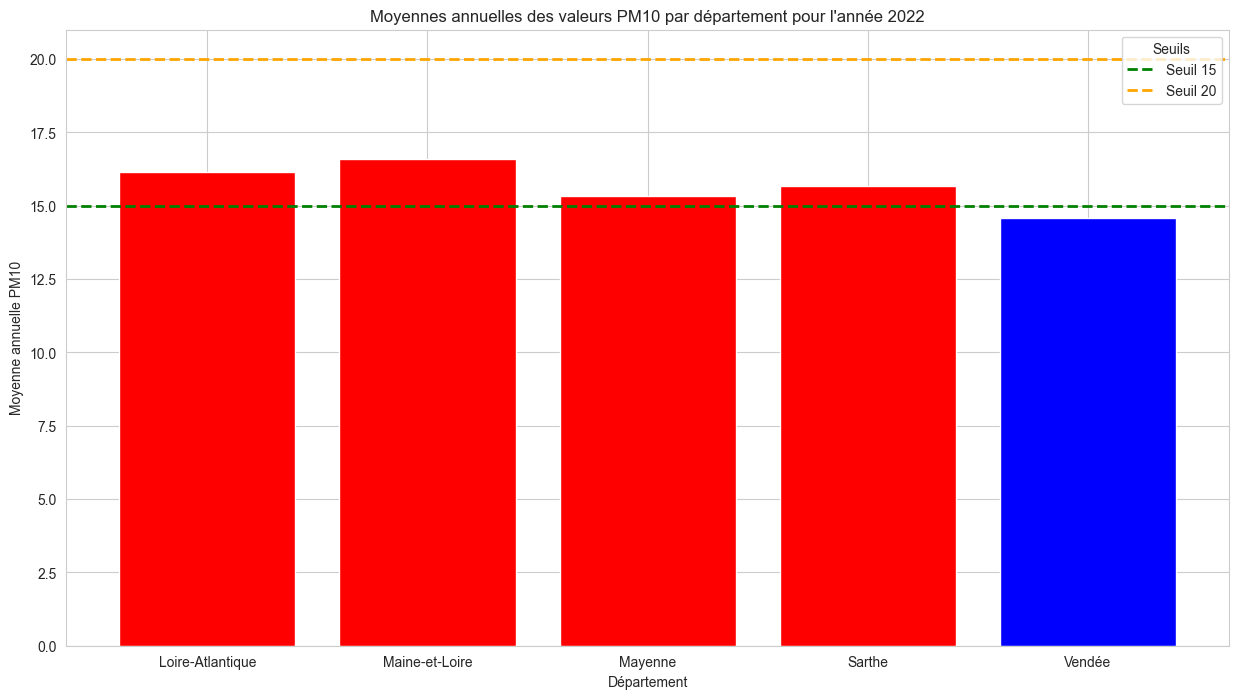

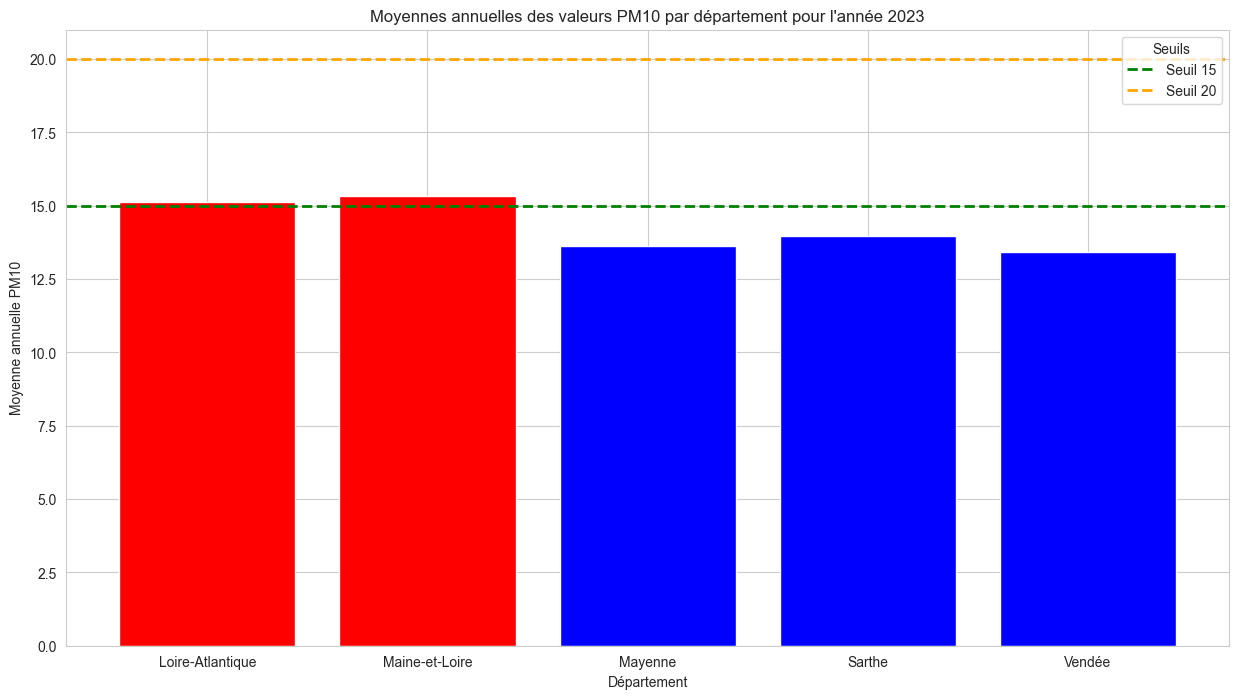

In [64]:
# Ajouter des colonnes pour les années
dfPM10['date'] = pd.to_datetime(dfPM10['date_heure_tu']).dt.tz_localize(None)
dfPM10['année'] = dfPM10['date'].dt.year

# Calculer la moyenne annuelle de PM10 pour chaque département
annual_means = dfPM10.groupby(['année', 'departement_nom'])['valeur'].mean().reset_index()

# Ajouter une colonne indiquant si la moyenne annuelle dépasse les seuils
annual_means['depasse_seuil'] = (annual_means['valeur'] > OBJECTIF_QUALITE_PM10) | (annual_means['valeur'] > VALEUR_LIMITE_ANNUELLE_PM10)

# Créer la palette de couleurs
annual_means['color'] = ['red' if x else 'blue' for x in annual_means['depasse_seuil']]

# Créer un graphique en bâtons pour chaque année
years = annual_means['année'].unique()

for year in years:
    plt.figure(figsize=(15, 8))
    yearly_data = annual_means[annual_means['année'] == year]
    colors = yearly_data['color']
    plt.bar(yearly_data['departement_nom'], yearly_data['valeur'], color=colors)
    
    # Ajouter des lignes horizontales pour les seuils
    plt.axhline(y=OBJECTIF_QUALITE_PM10, color='green', linestyle='--', linewidth=2, label=f'Seuil {OBJECTIF_QUALITE_PM10}')
    plt.axhline(y=VALEUR_LIMITE_ANNUELLE_PM10, color='orange', linestyle='--', linewidth=2, label=f'Seuil {VALEUR_LIMITE_ANNUELLE_PM10}')
    
    plt.xlabel('Département')
    plt.ylabel('Moyenne annuelle PM10')
    plt.title(f'Moyennes annuelles des valeurs PM10 par département pour l\'année {year}')
    plt.legend(title='Seuils')
    plt.xticks(rotation=0)  # Rotation pour mieux afficher les noms des départements
    plt.show()




Graphique pour voir par année, quand est-ce qu'on à dépassé les seuils des valeurs limites annuelles

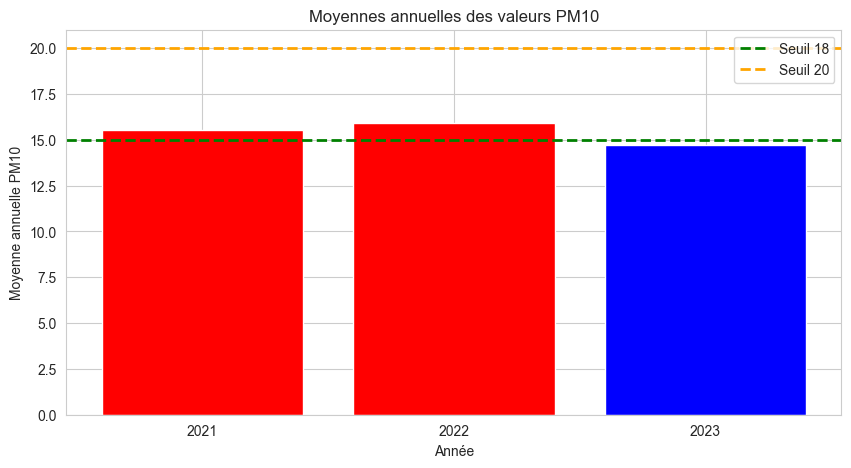

In [65]:
# Grouper les données par année
dfPM10['année'] = dfPM10['date_heure_tu'].dt.year
annual_means = dfPM10.groupby('année')['valeur'].mean().reset_index()

# Créer la colonne indiquant si la moyenne annuelle dépasse le seuil
annual_means['depasse_seuil'] = ((annual_means['valeur'] > OBJECTIF_QUALITE_PM10).astype(int) |
                                (annual_means['valeur'] > OBJECTIF_QUALITE_PM10).astype(int))

# Créer le diagramme en bâtons
plt.figure(figsize=(10, 5))
colors = ['red' if x == 1 else 'blue' for x in annual_means['depasse_seuil']]
plt.bar(annual_means['année'], annual_means['valeur'], color=colors)
plt.axhline(y=OBJECTIF_QUALITE_PM10, color='green', linestyle='--', linewidth=2, label=f'Seuil {OBJECTIF_QUALITE_PM10_MENSUEL}')
plt.axhline(y=VALEUR_LIMITE_ANNUELLE_PM10, color='orange', linestyle='--', linewidth=2, label=f'Seuil {VALEUR_LIMITE_ANNUELLE_PM10}')
plt.xlabel('Année')
plt.ylabel('Moyenne annuelle PM10')
plt.title('Moyennes annuelles des valeurs PM10')
plt.xticks(annual_means['année'])
plt.legend()
plt.show()

#### Graphique pour voir trimestriel par département, quand est-ce qu'on à dépassé le seuil de cible_objectif_qualité_PM10_mensuel (valeur de seuil = 18, en rouge quand depassé)


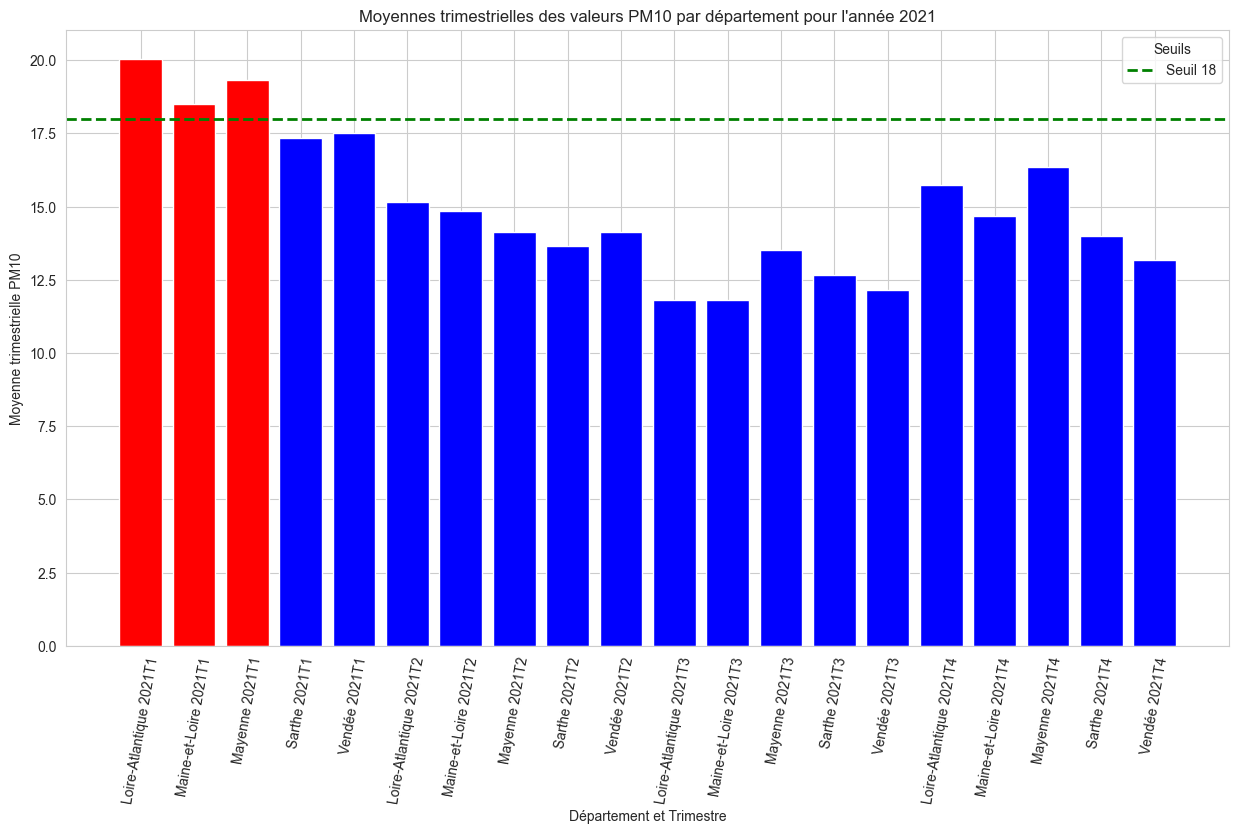

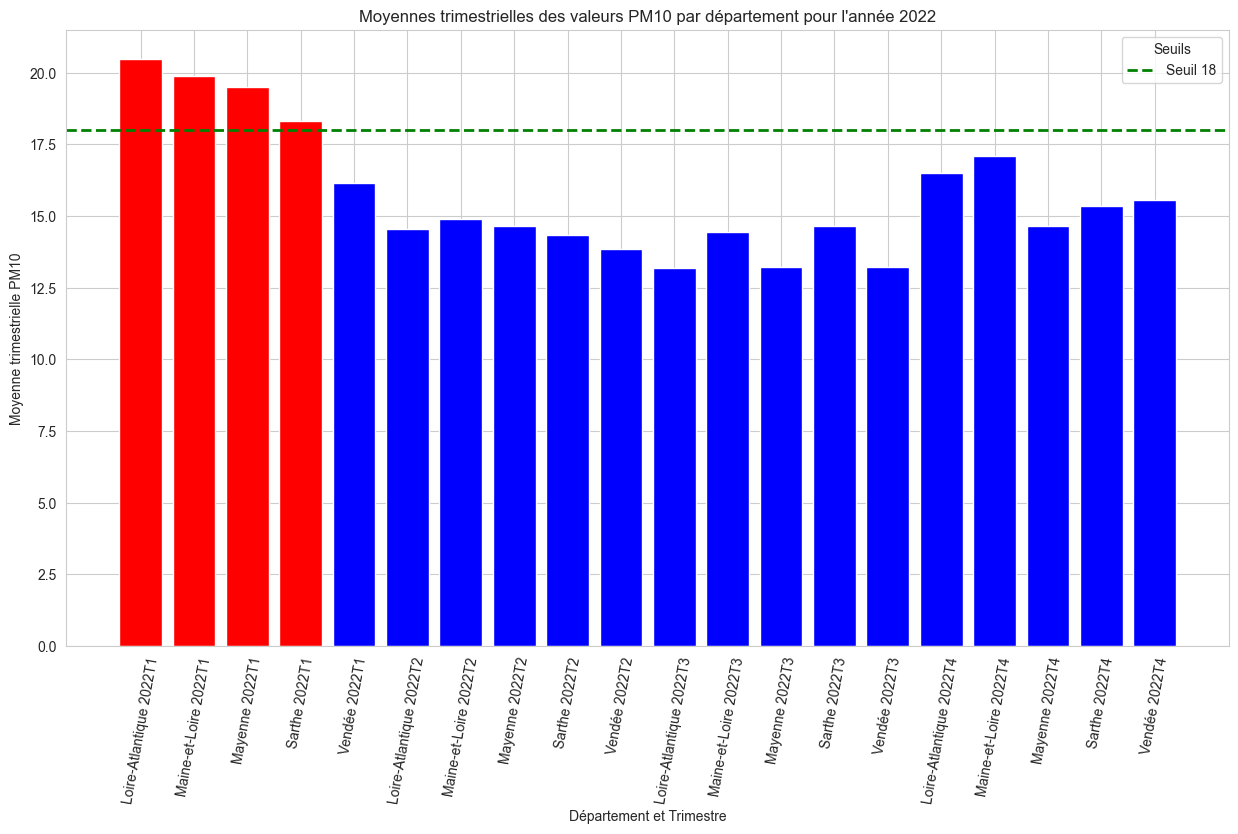

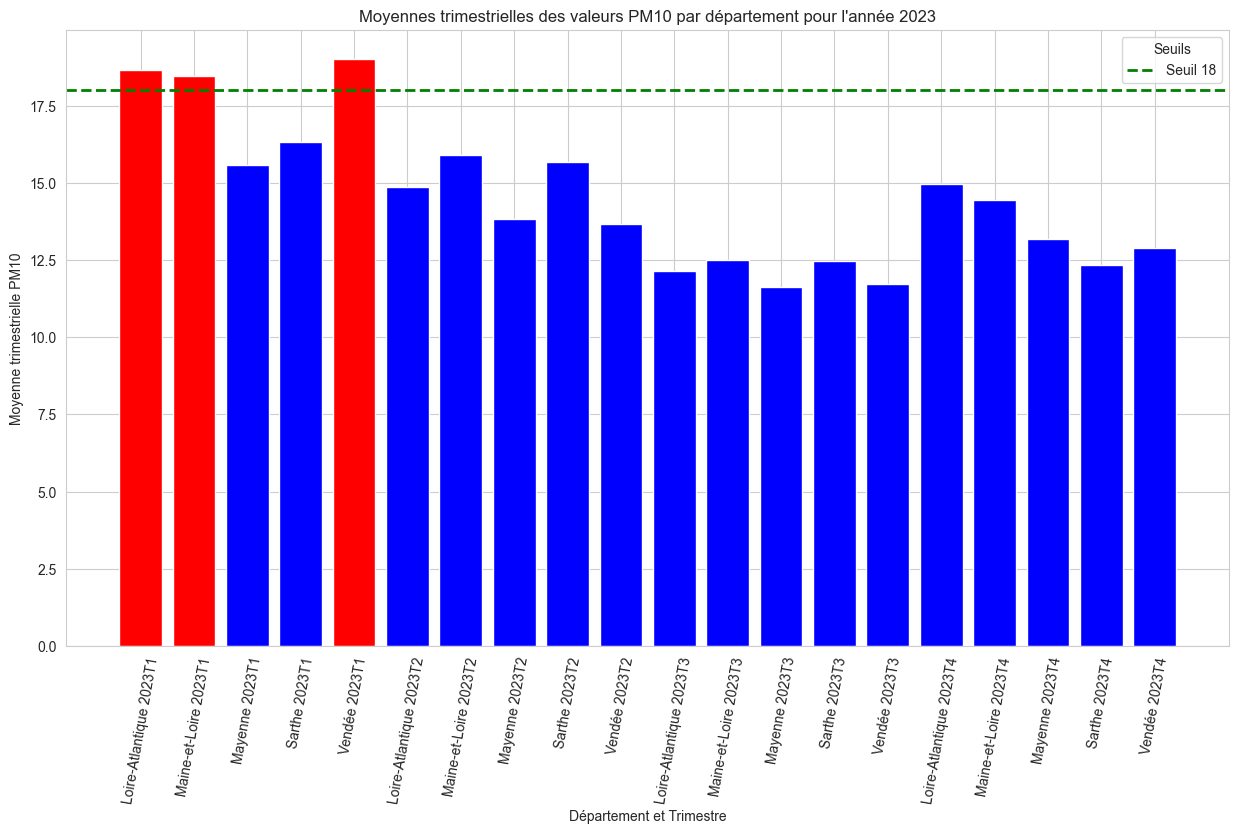

In [66]:
# Convertir les colonnes de date en format datetime si ce n'est pas déjà fait
dfPM10['date_heure_tu'] = pd.to_datetime(dfPM10['date_heure_tu'])

# Supprimer le fuseau horaire avant la conversion en périodes trimestrielles
dfPM10['date_heure_tu'] = dfPM10['date_heure_tu'].dt.tz_localize(None)

# Ajouter les colonnes 'année' et 'trimestre'
dfPM10['année'] = dfPM10['date_heure_tu'].dt.year
dfPM10['trimestre'] = dfPM10['date_heure_tu'].dt.to_period('Q').astype(str).str.replace('Q', 'T')

# Calculer la moyenne trimestrielle de PM10 pour chaque département et chaque année
quarterly_means = dfPM10.groupby(['année', 'trimestre', 'departement_nom'])['valeur'].mean().reset_index()

# Ajouter une colonne indiquant si la moyenne trimestrielle dépasse le seuil
quarterly_means['depasse_seuil'] = (quarterly_means['valeur'] > OBJECTIF_QUALITE_PM10_MENSUEL)

# Créer la palette de couleurs
quarterly_means['color'] = ['red' if x else 'blue' for x in quarterly_means['depasse_seuil']]

# Créer un graphique en bâtons pour chaque année
years = quarterly_means['année'].unique()

for year in years:
    plt.figure(figsize=(15, 8))
    annual_data = quarterly_means[quarterly_means['année'] == year]
    
    # Boucler sur les trimestres pour créer les groupes
    for quarter in annual_data['trimestre'].unique():
        quarterly_data = annual_data[annual_data['trimestre'] == quarter]
        colors = quarterly_data['color']
        plt.bar(quarterly_data['departement_nom'] + " " + quarterly_data['trimestre'], quarterly_data['valeur'], color=colors)

    # Ajouter des lignes horizontales pour les seuils
    plt.axhline(y=OBJECTIF_QUALITE_PM10_MENSUEL, color='green', linestyle='--', linewidth=2, label=f'Seuil {OBJECTIF_QUALITE_PM10_MENSUEL}')

    plt.xlabel('Département et Trimestre')
    plt.ylabel('Moyenne trimestrielle PM10')
    plt.title(f'Moyennes trimestrielles des valeurs PM10 par département pour l\'année {year}')
    plt.legend(title='Seuils')
    plt.xticks(rotation=80)  # Rotation pour mieux afficher les noms des départements
    plt.show()


#### Graphique pour voir trimestriel par département, par ville quand est-ce qu'on à dépassé le seuil de cible_objectif_qualité_PM10_mensuel (valeur de seuil = 18, en rouge quand depassé)


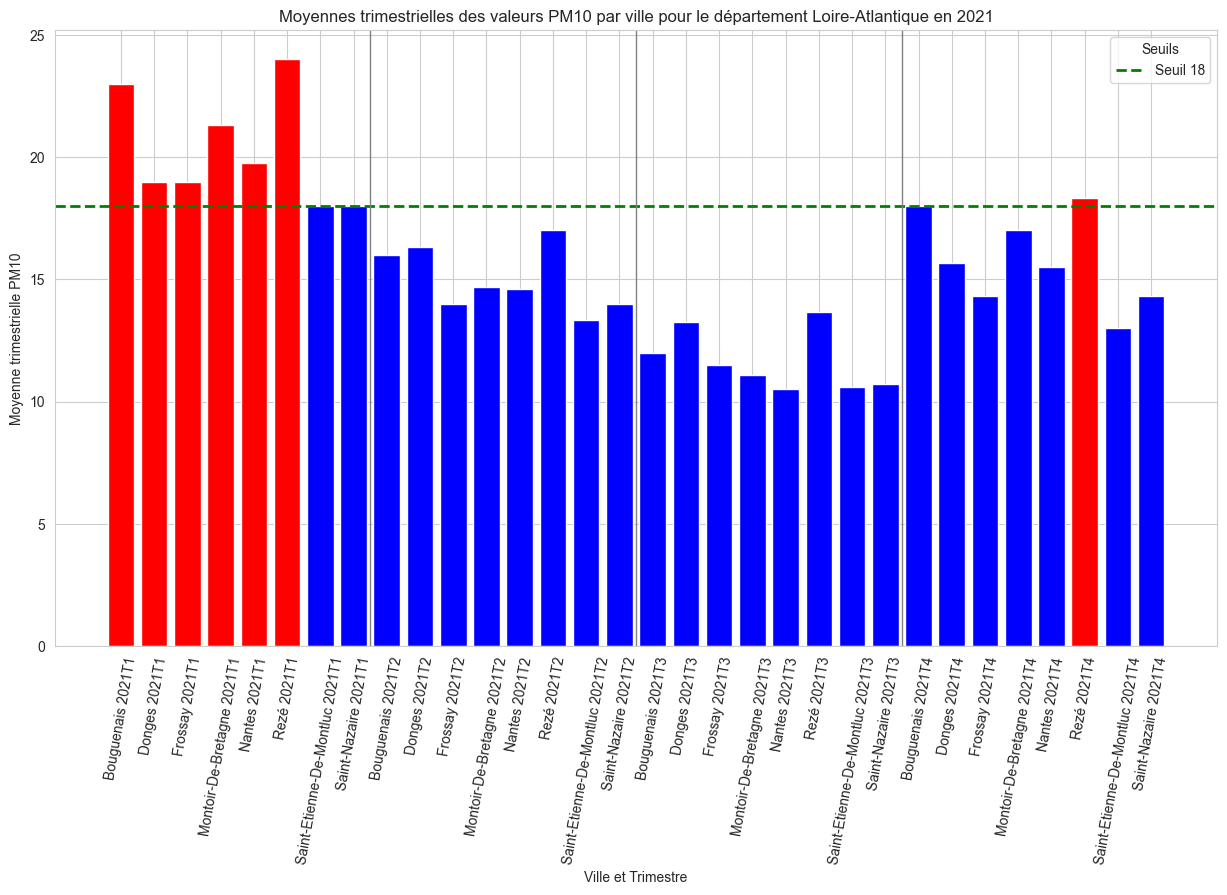

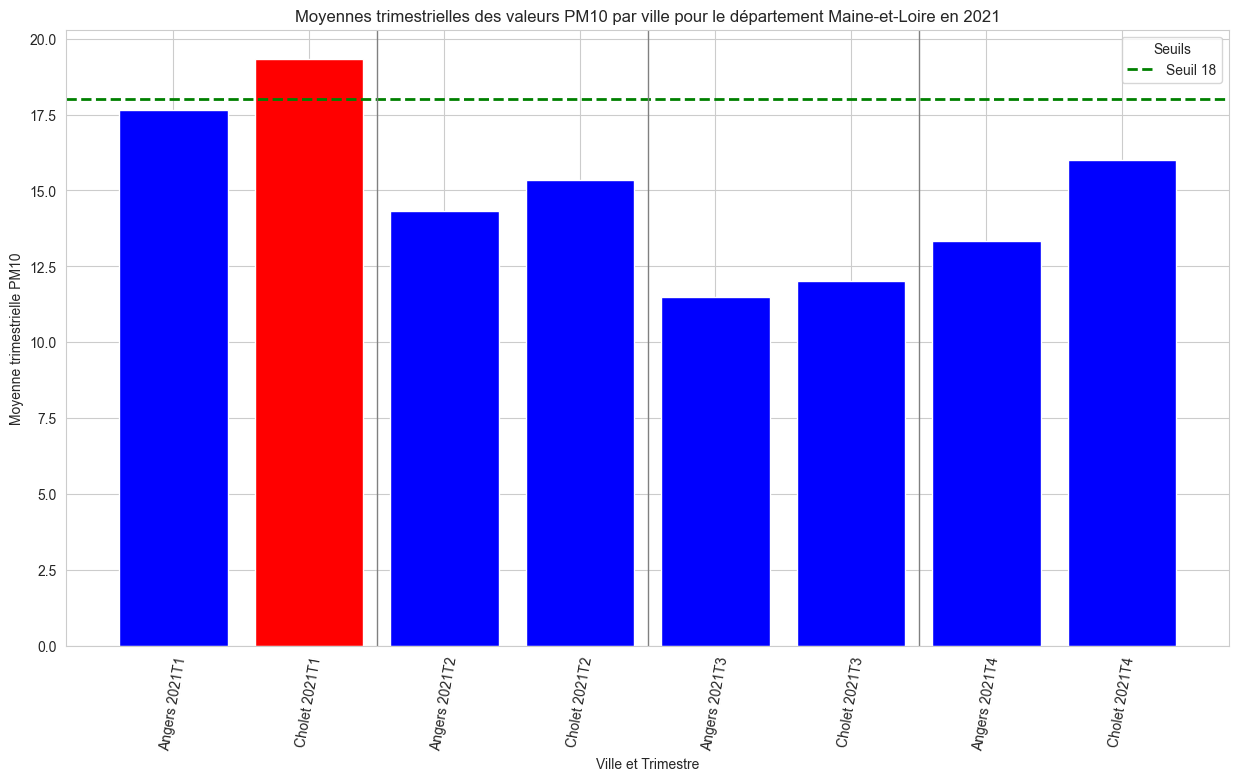

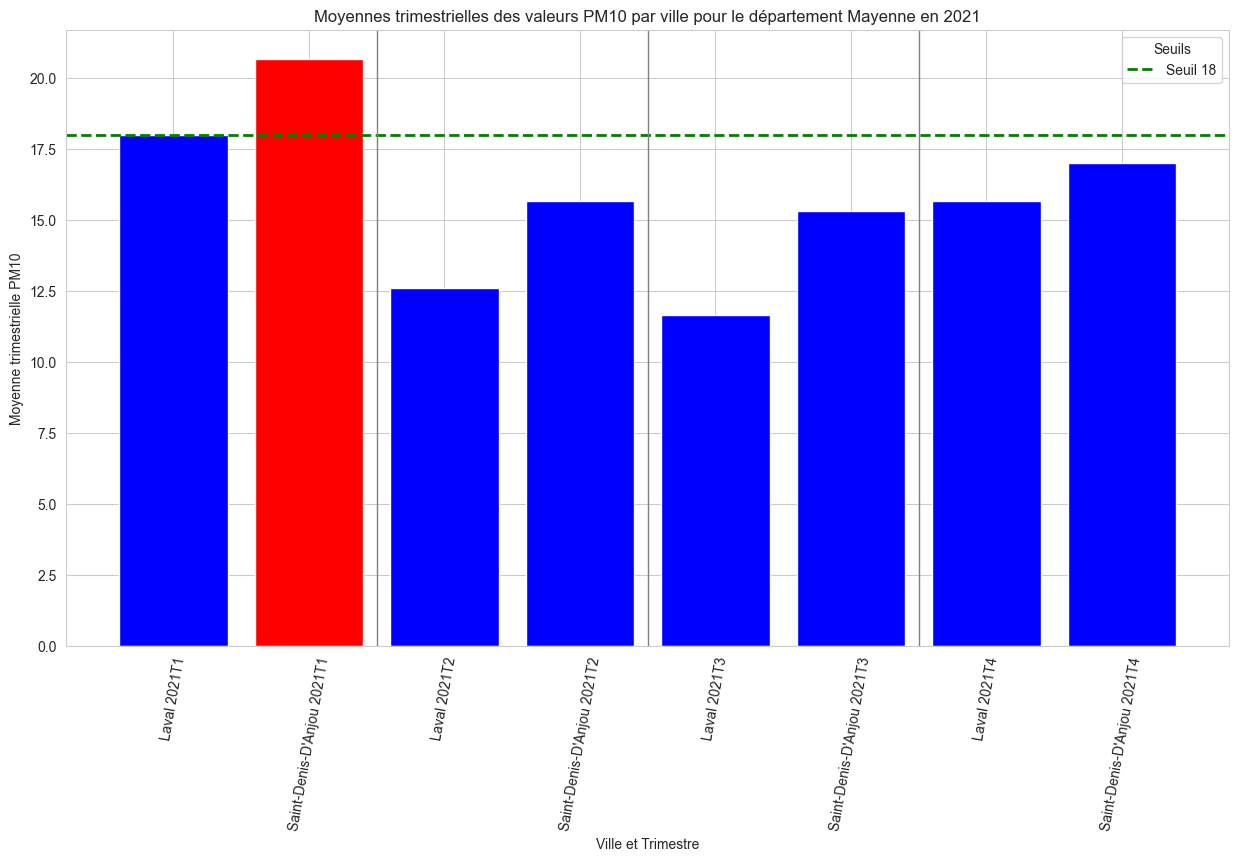

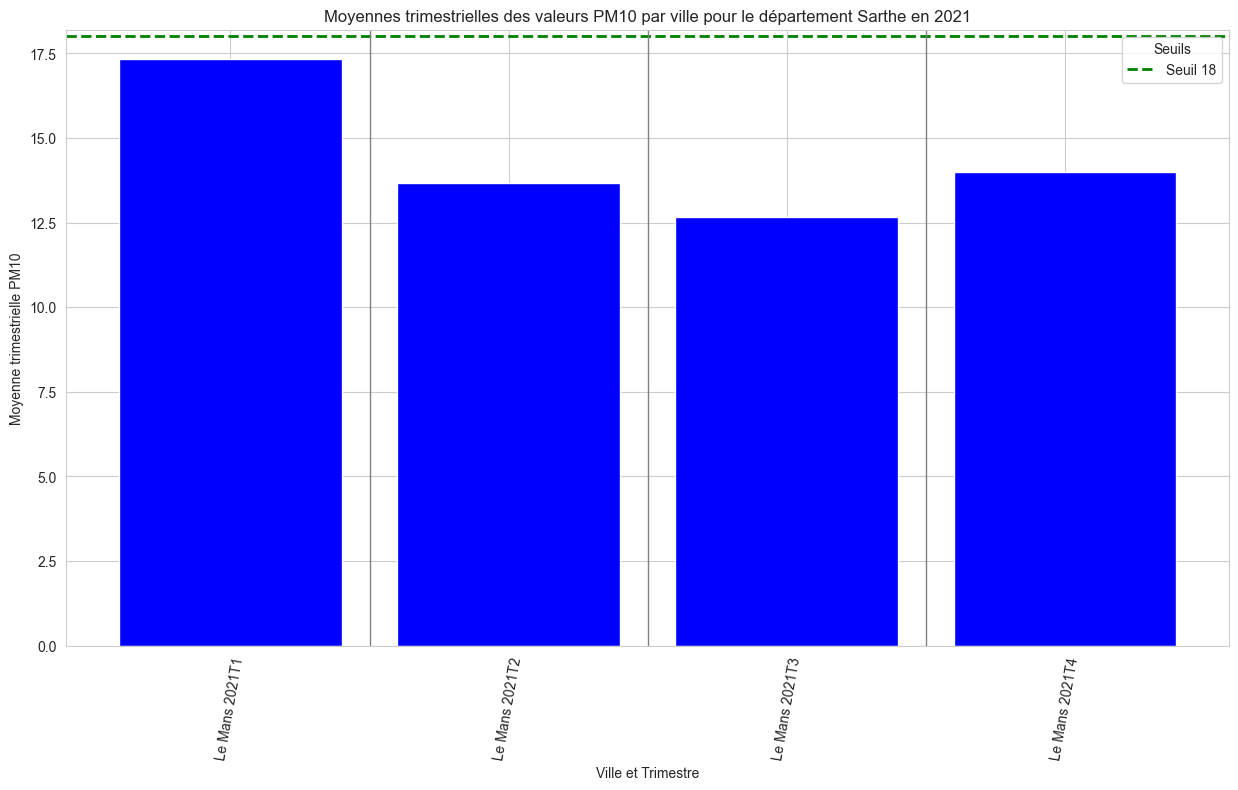

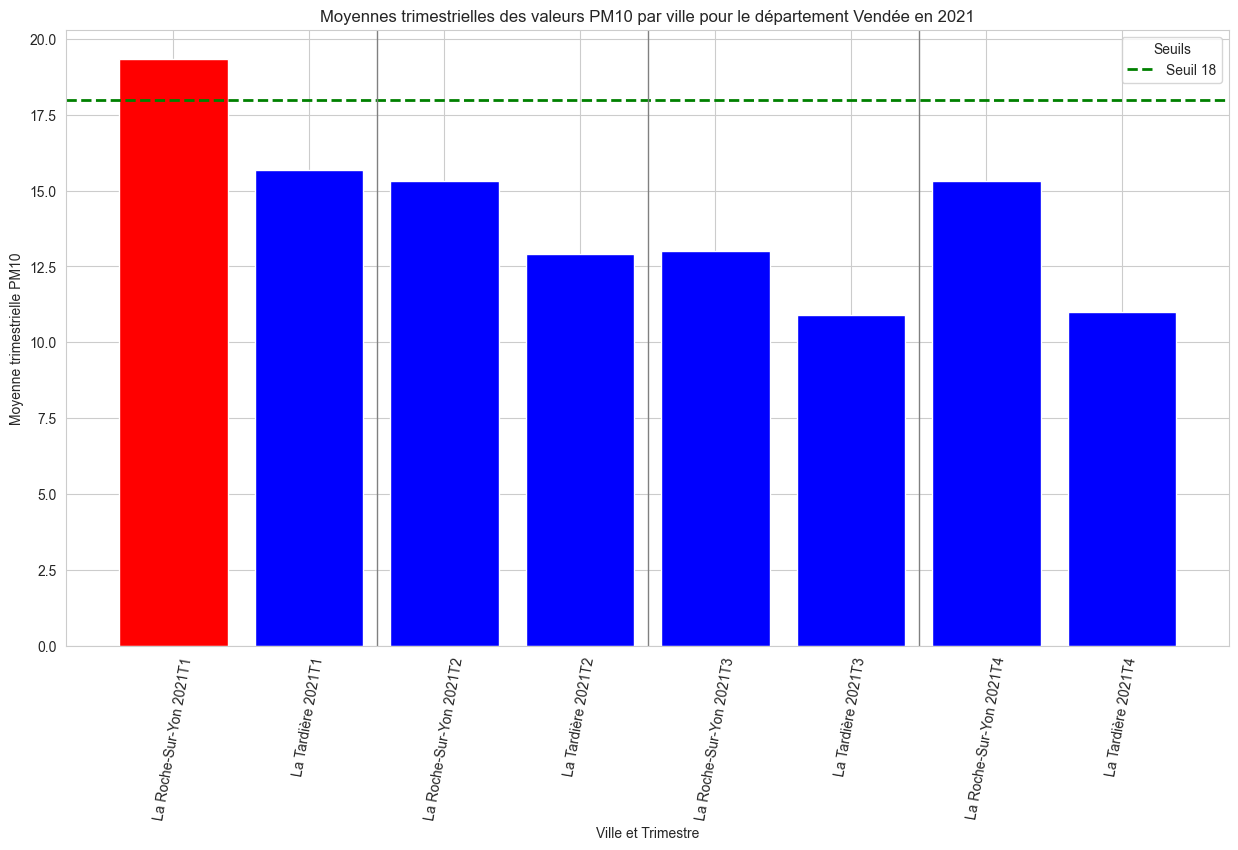

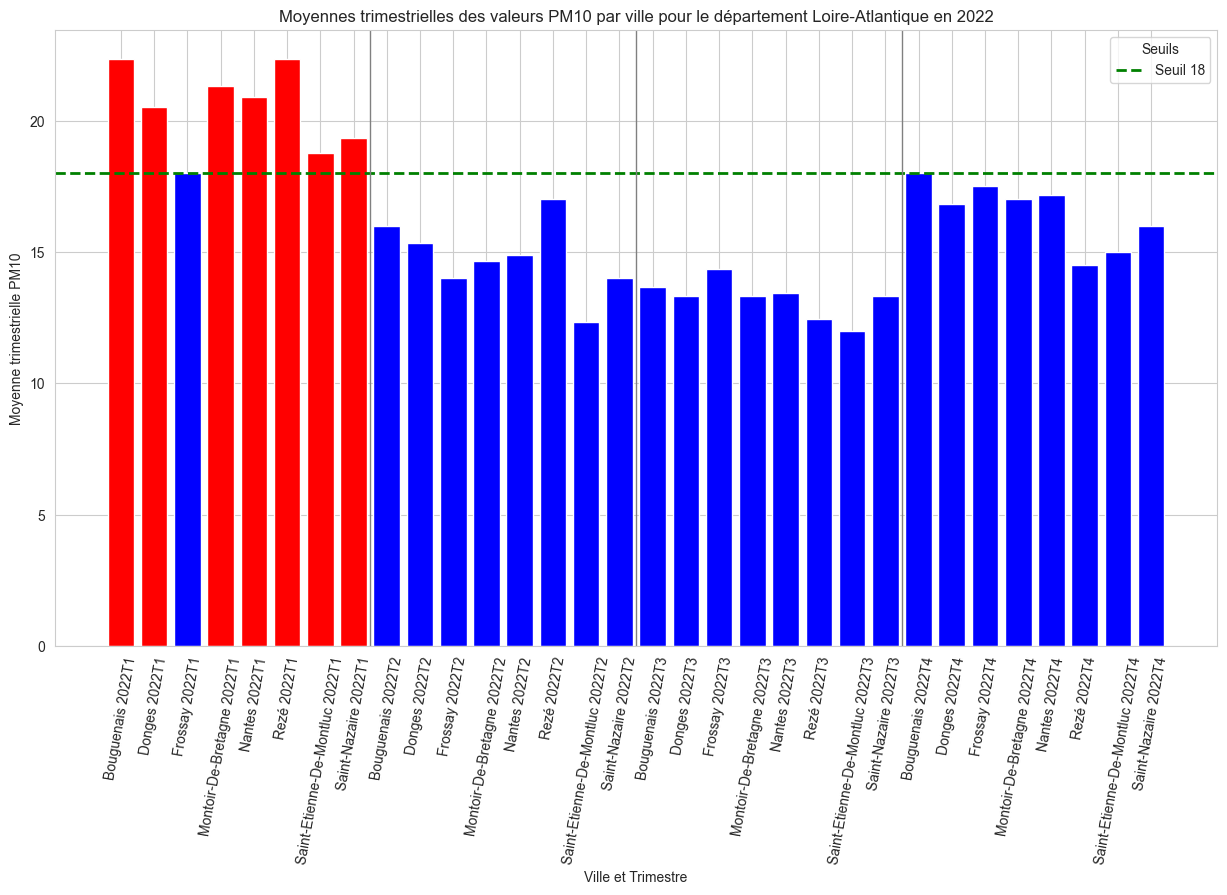

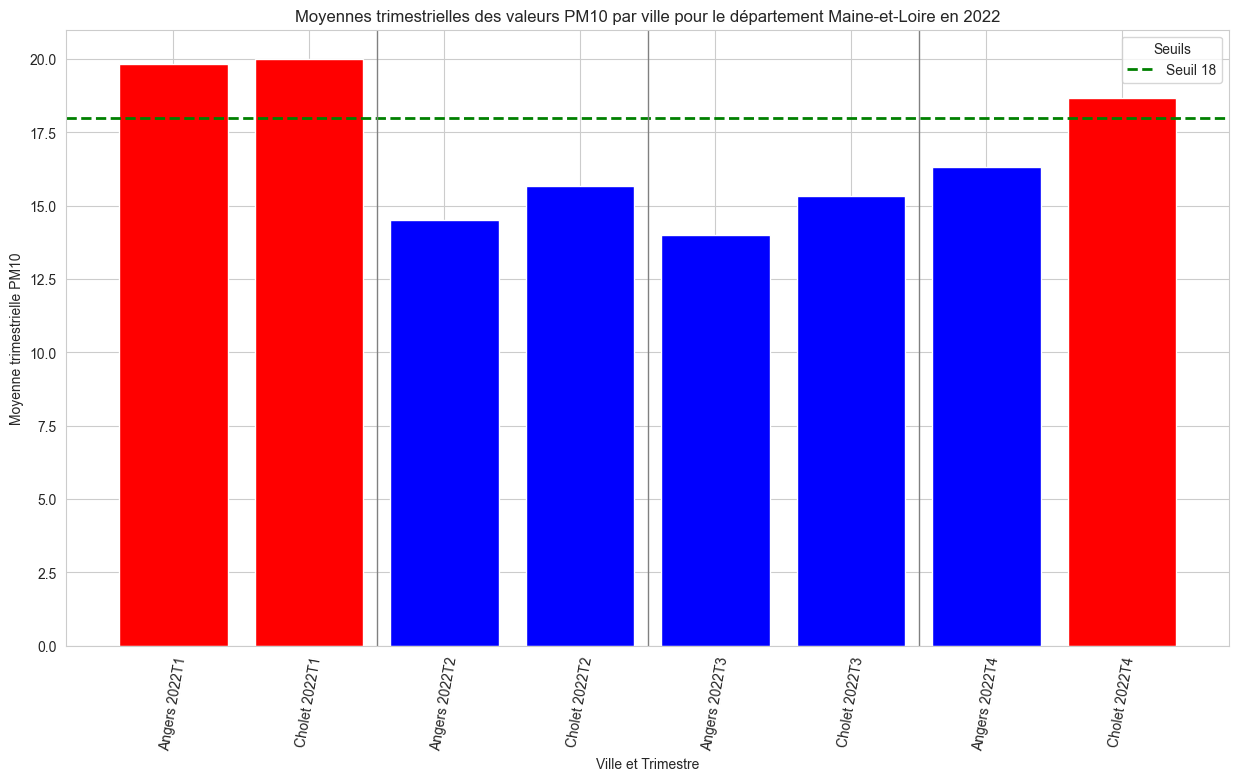

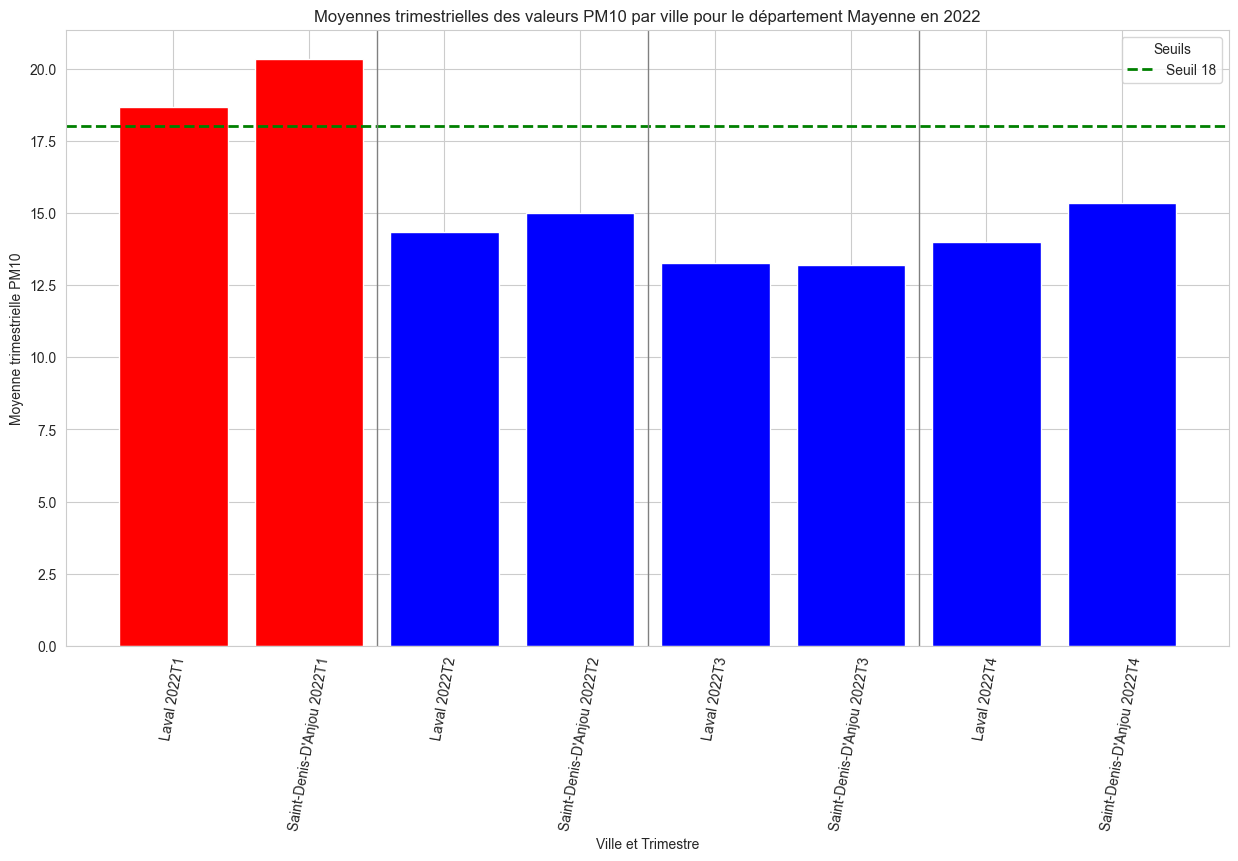

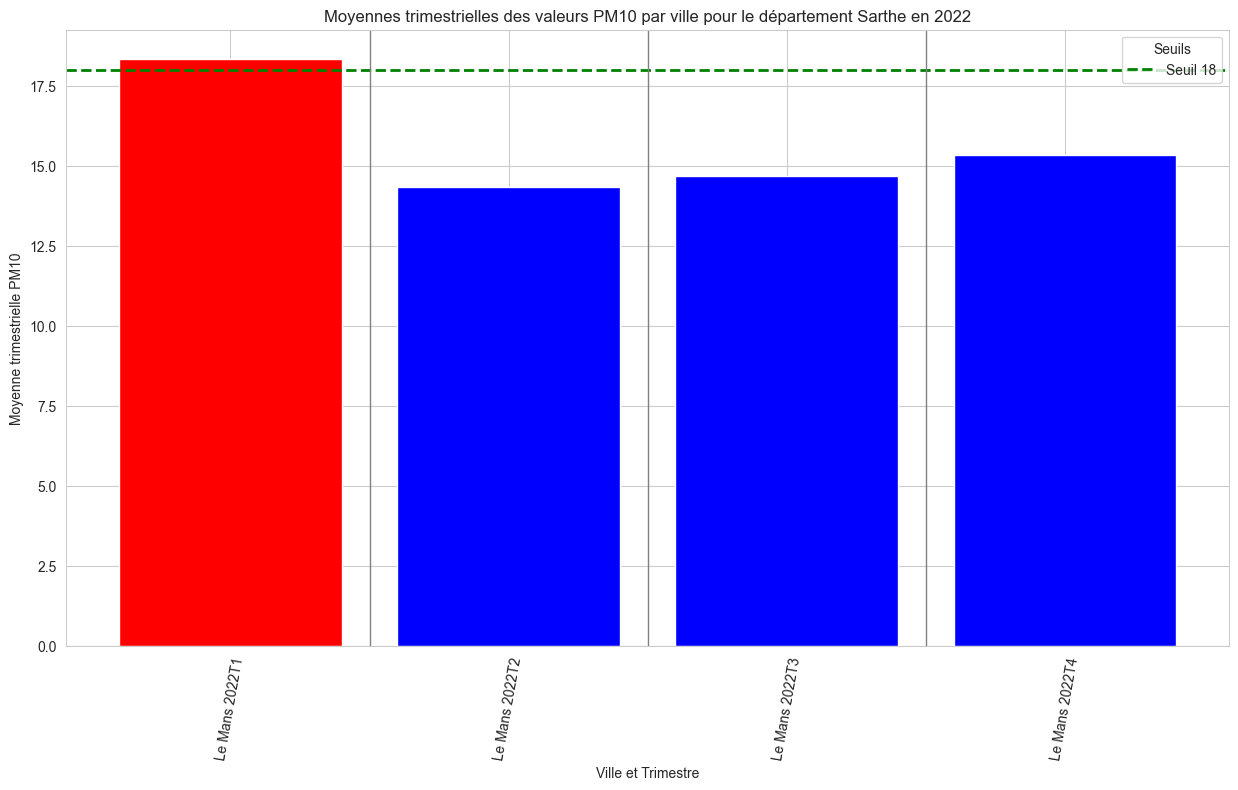

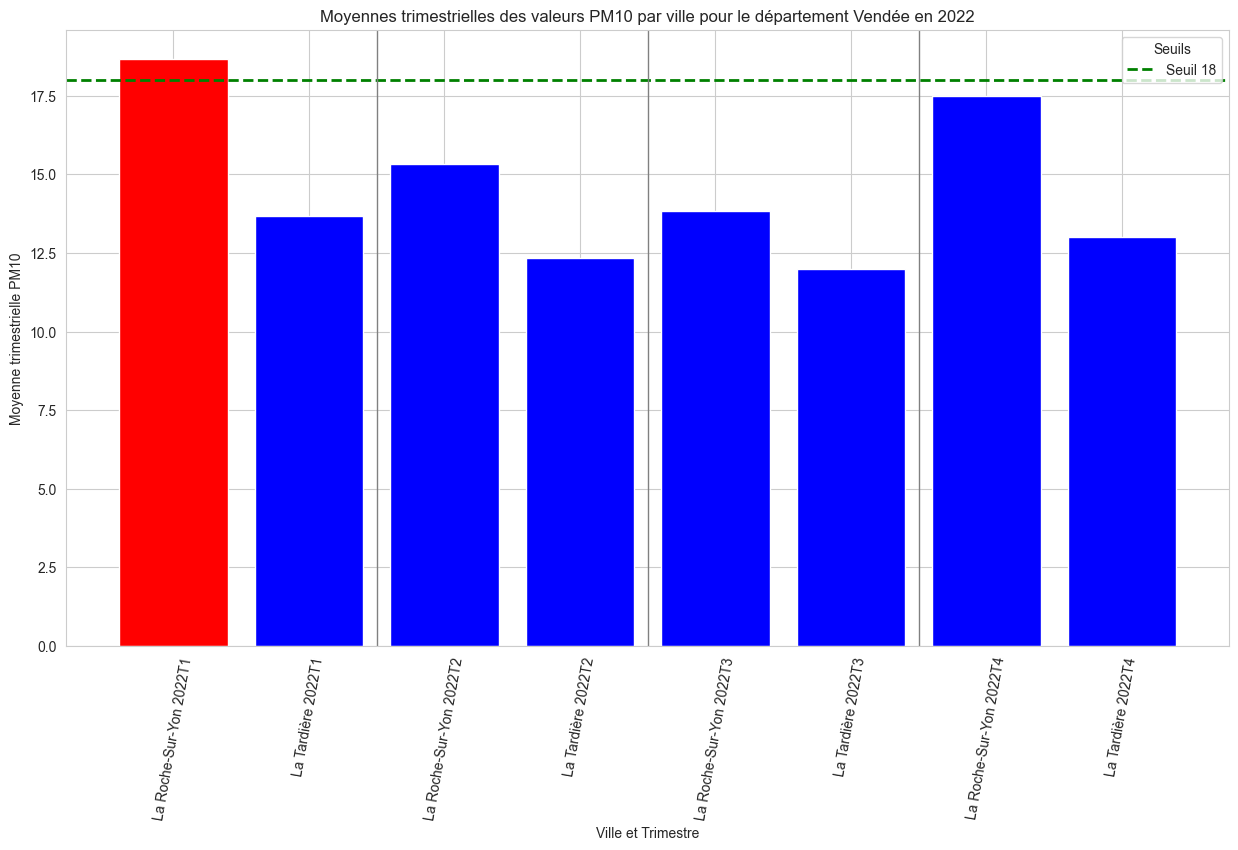

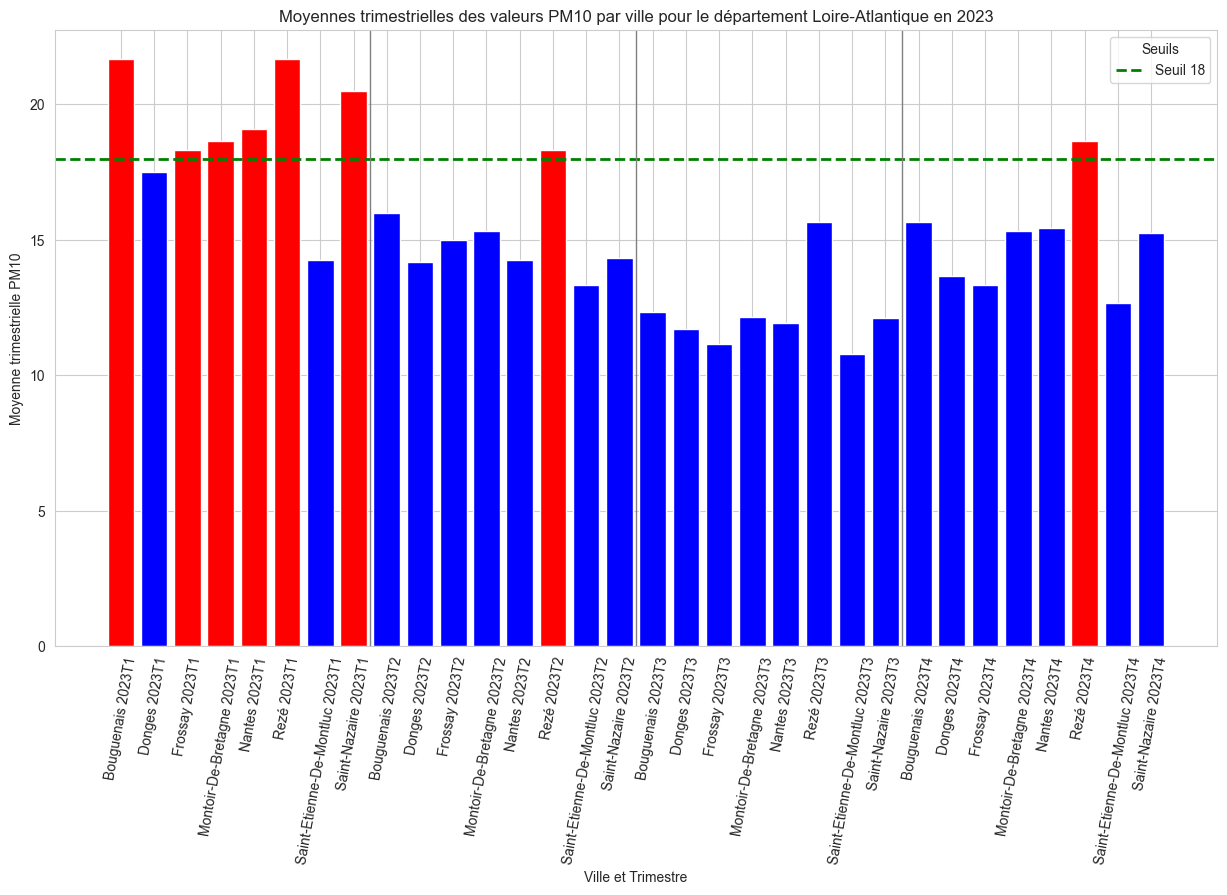

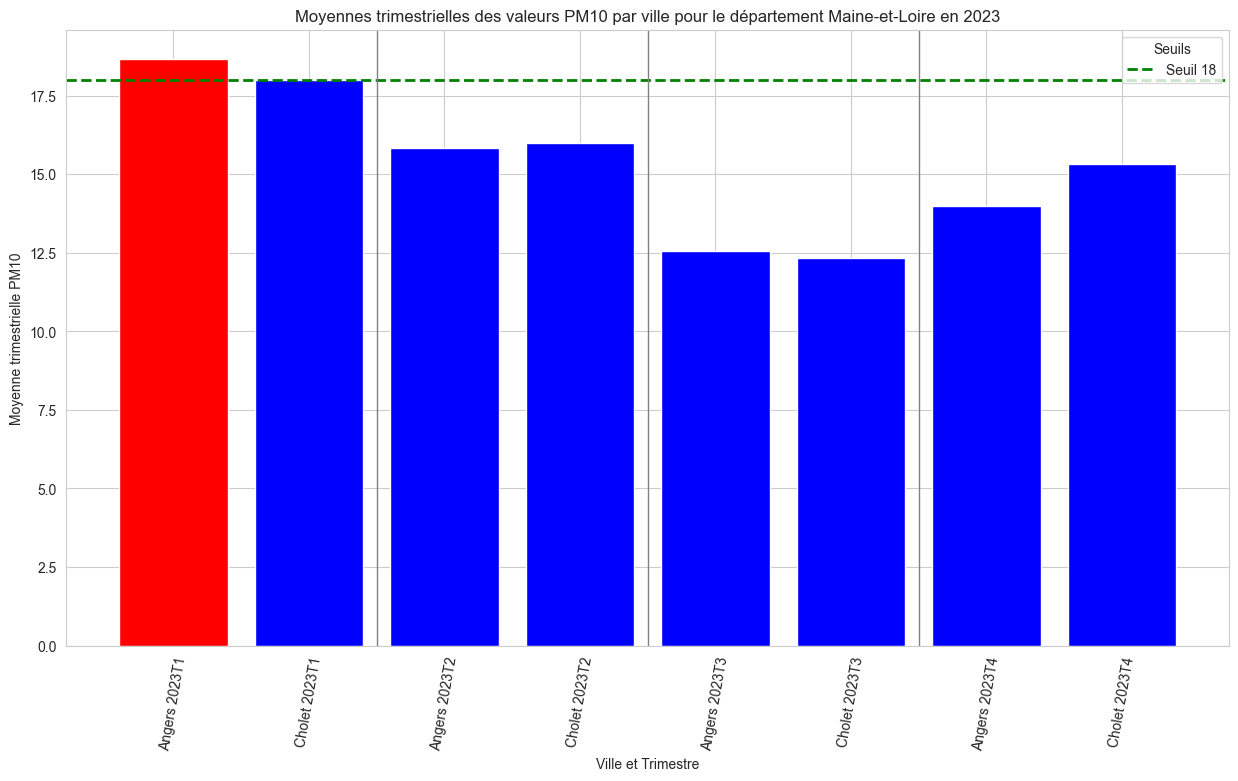

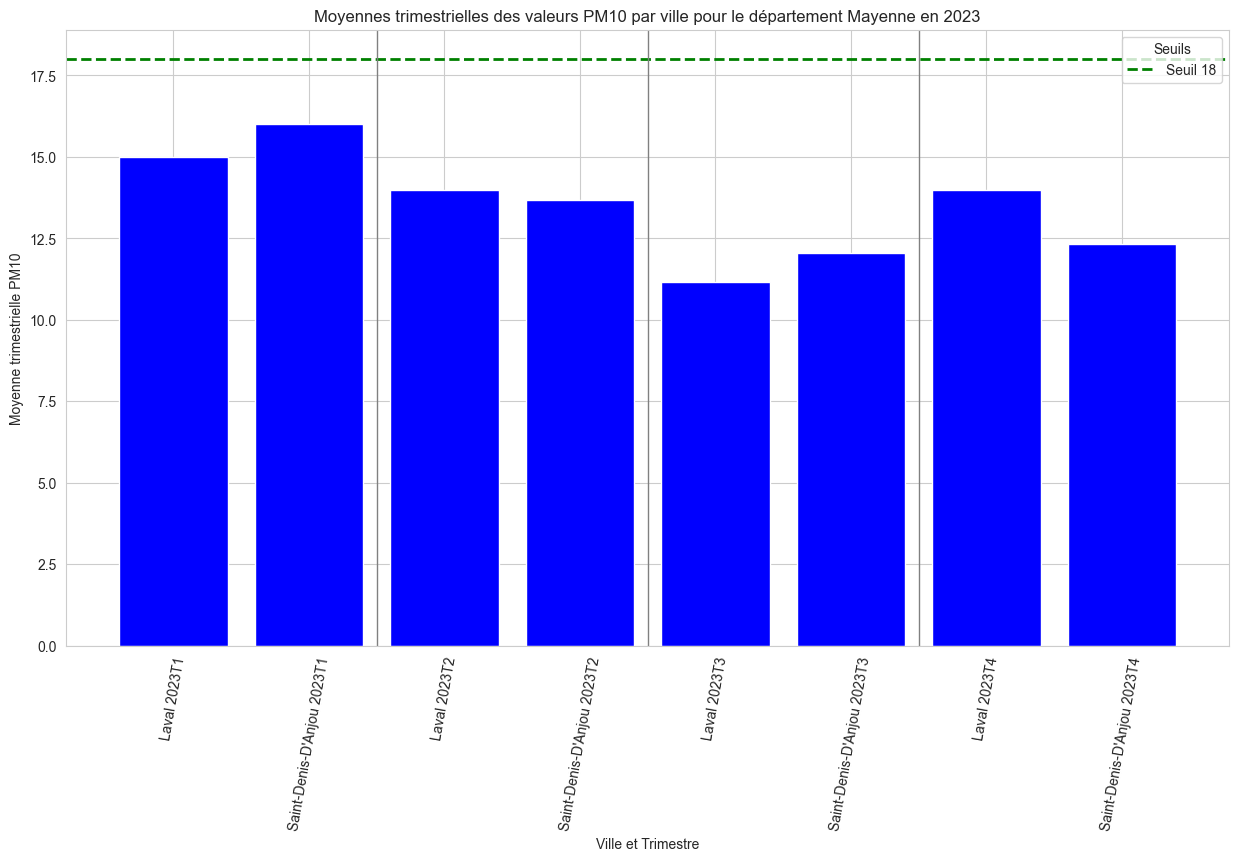

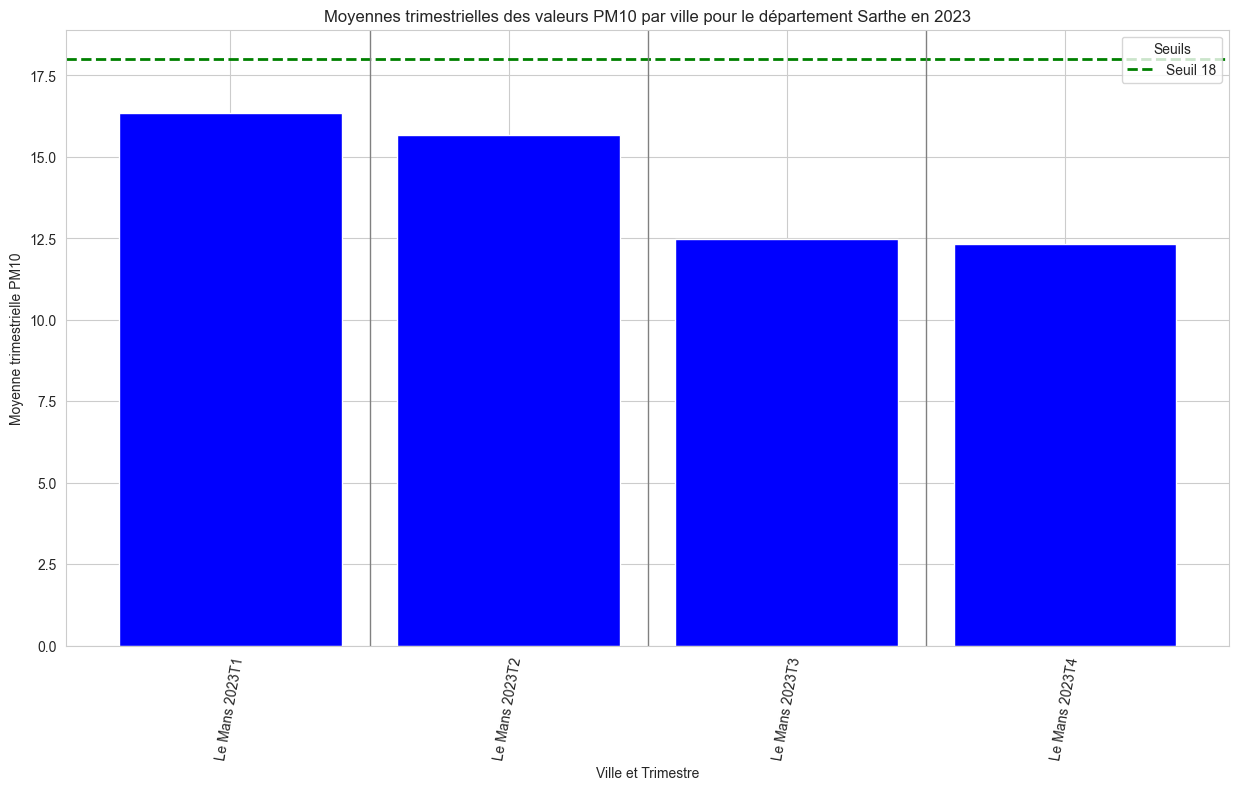

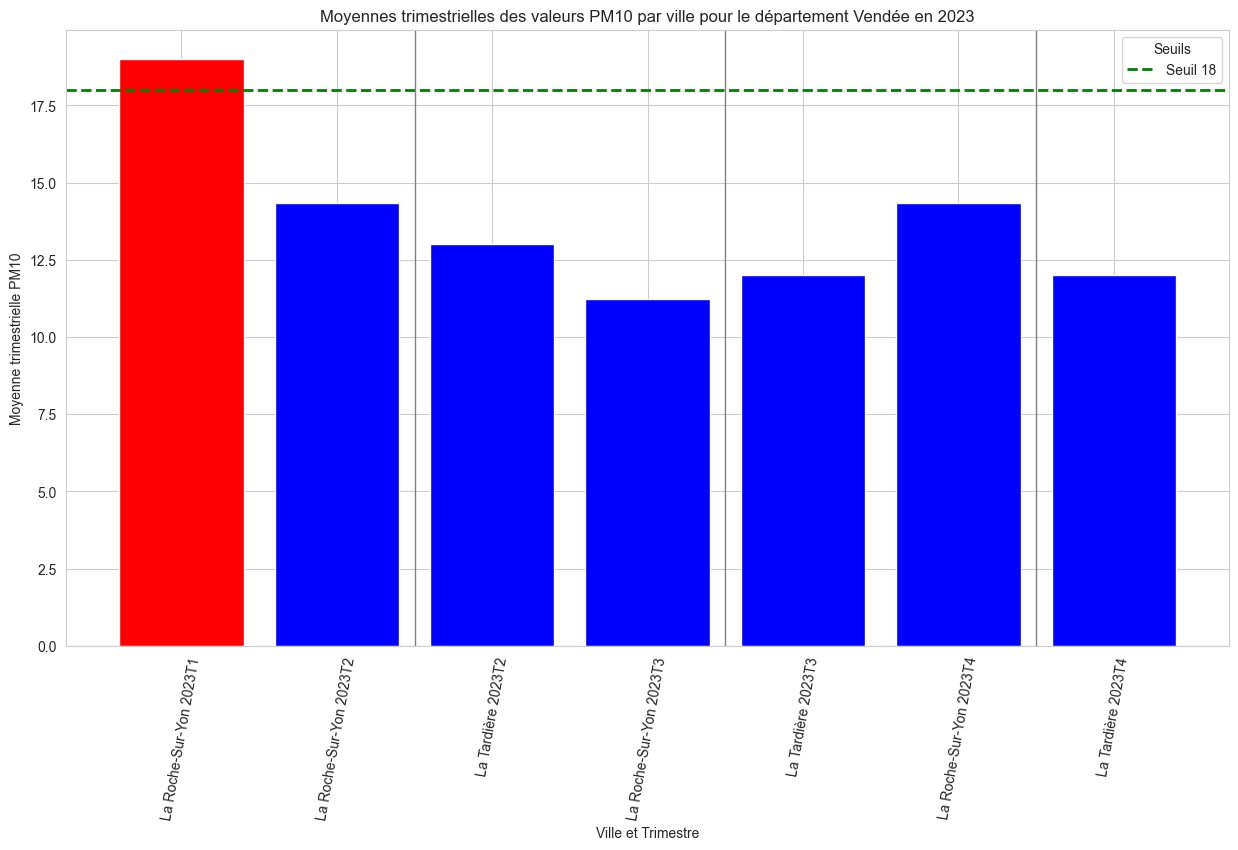

In [60]:
# Convertir les colonnes de date en format datetime si ce n'est pas déjà fait
dfPM10['date_heure_tu'] = pd.to_datetime(dfPM10['date_heure_tu'])

# Supprimer le fuseau horaire avant la conversion en périodes trimestrielles
dfPM10['date_heure_tu'] = dfPM10['date_heure_tu'].dt.tz_localize(None)

# Ajouter les colonnes 'année' et 'trimestre'
dfPM10['année'] = dfPM10['date_heure_tu'].dt.year
dfPM10['trimestre'] = dfPM10['date_heure_tu'].dt.to_period('Q').astype(str).str.replace('Q', 'T')

# Calculer la moyenne trimestrielle de PM10 pour chaque département, chaque ville et chaque année
quarterly_means = dfPM10.groupby(['année', 'trimestre', 'departement_nom', 'nom_commune'])['valeur'].mean().reset_index()

# Ajouter une colonne indiquant si la moyenne trimestrielle dépasse les seuils
quarterly_means['depasse_seuil'] = (quarterly_means['valeur'] > OBJECTIF_QUALITE_PM10_MENSUEL)
# Créer la palette de couleurs
quarterly_means['color'] = ['red' if x else 'blue' for x in quarterly_means['depasse_seuil']]

# Créer un graphique en bâtons pour chaque année et chaque département
years = quarterly_means['année'].unique()
departments = quarterly_means['departement_nom'].unique()

for year in years:
    for department in departments:
        plt.figure(figsize=(15, 8))
        annual_dept_data = quarterly_means[(quarterly_means['année'] == year) & (quarterly_means['departement_nom'] == department)]
        
        if not annual_dept_data.empty:
            # Boucler sur les trimestres pour créer les groupes
            for quarter in annual_dept_data['trimestre'].unique():
                quarterly_data = annual_dept_data[annual_dept_data['trimestre'] == quarter]
                colors = quarterly_data['color']
                plt.bar(quarterly_data['nom_commune'] + " " + quarterly_data['trimestre'], quarterly_data['valeur'], color=colors)

            # Ajouter des lignes horizontales pour les seuils
            plt.axhline(y=OBJECTIF_QUALITE_PM10_MENSUEL, color='green', linestyle='--', linewidth=2, label=f'Seuil {OBJECTIF_QUALITE_PM10_MENSUEL}')

            # Ajouter des lignes verticales pour séparer les trimestres
            for i in range(1, 4):
                plt.axvline(x=i*len(quarterly_data['nom_commune']) - 0.5, color='grey', linestyle='-', linewidth=1)
            
            plt.xlabel('Ville et Trimestre')
            plt.ylabel('Moyenne trimestrielle PM10')
            plt.title(f'Moyennes trimestrielles des valeurs PM10 par ville pour le département {department} en {year}')
            plt.legend(title='Seuils')
            plt.xticks(rotation=80)  # Rotation pour mieux afficher les noms des villes
            plt.show()


#### Évolution Mensuelle des Concentrations de Polluants

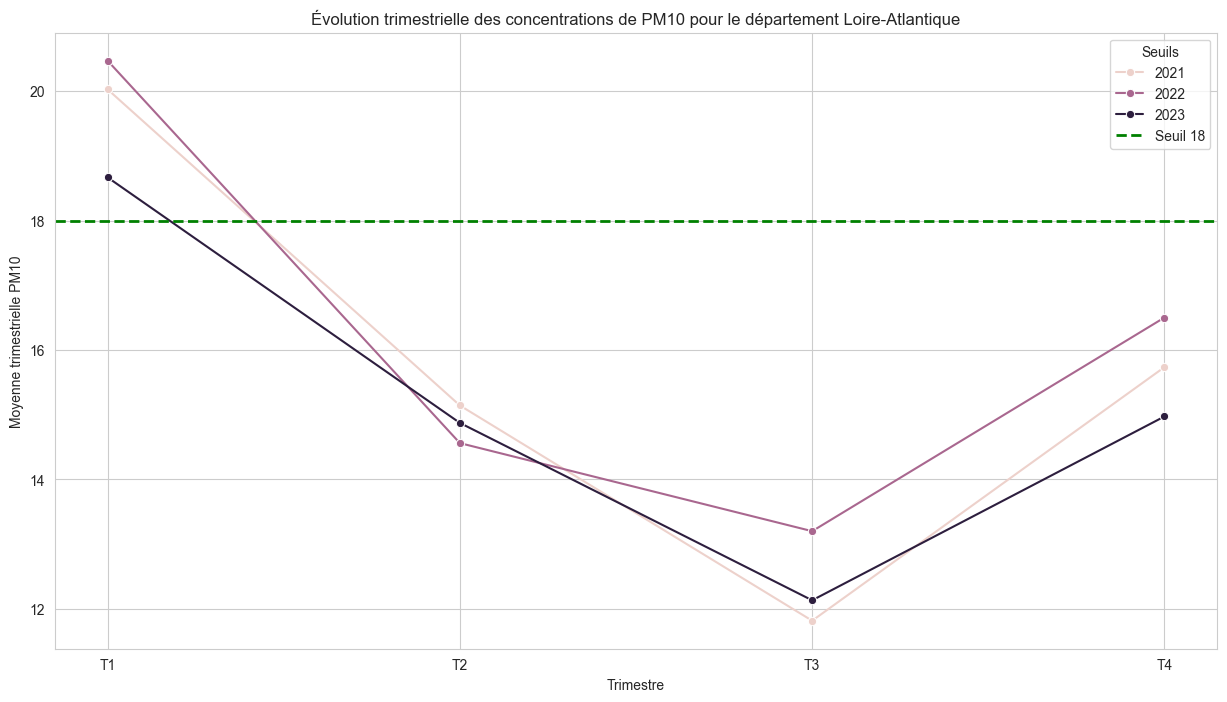

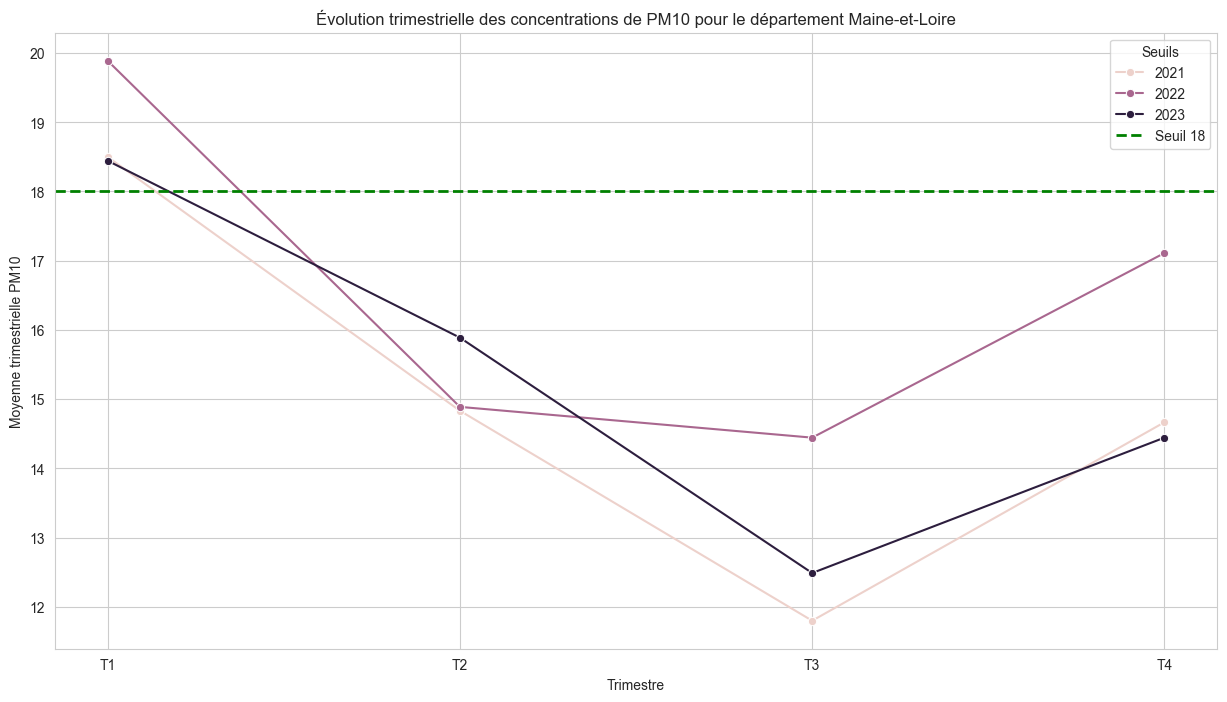

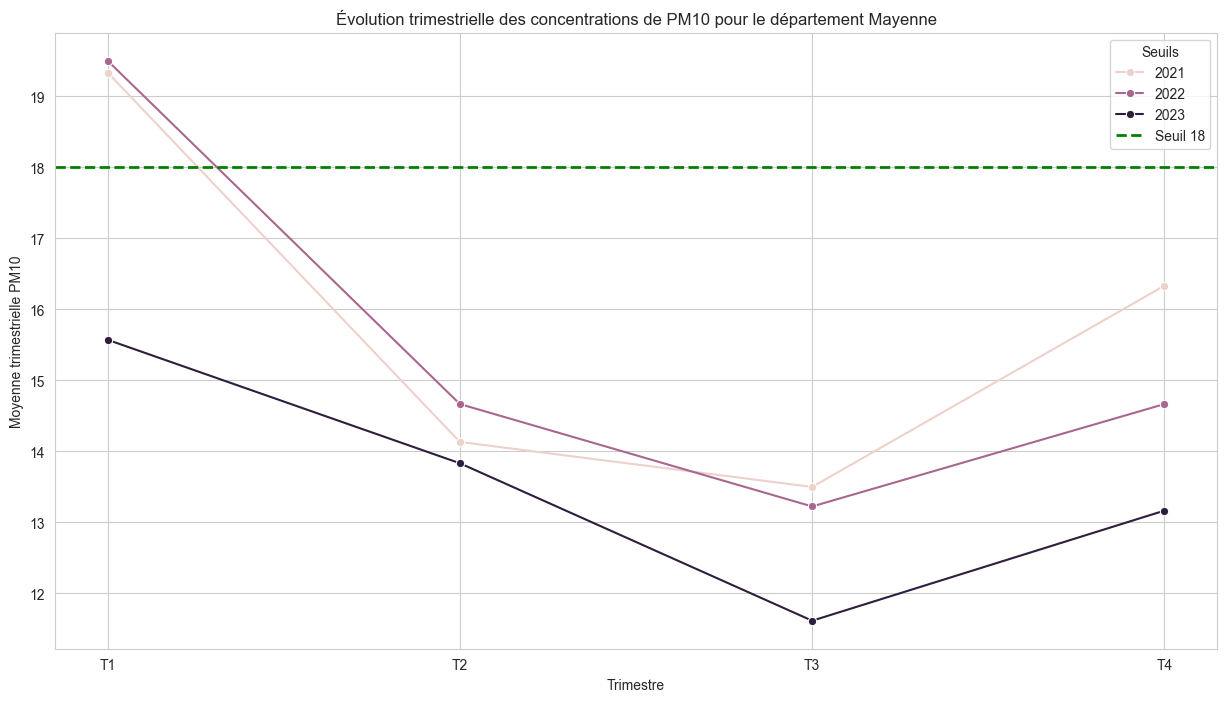

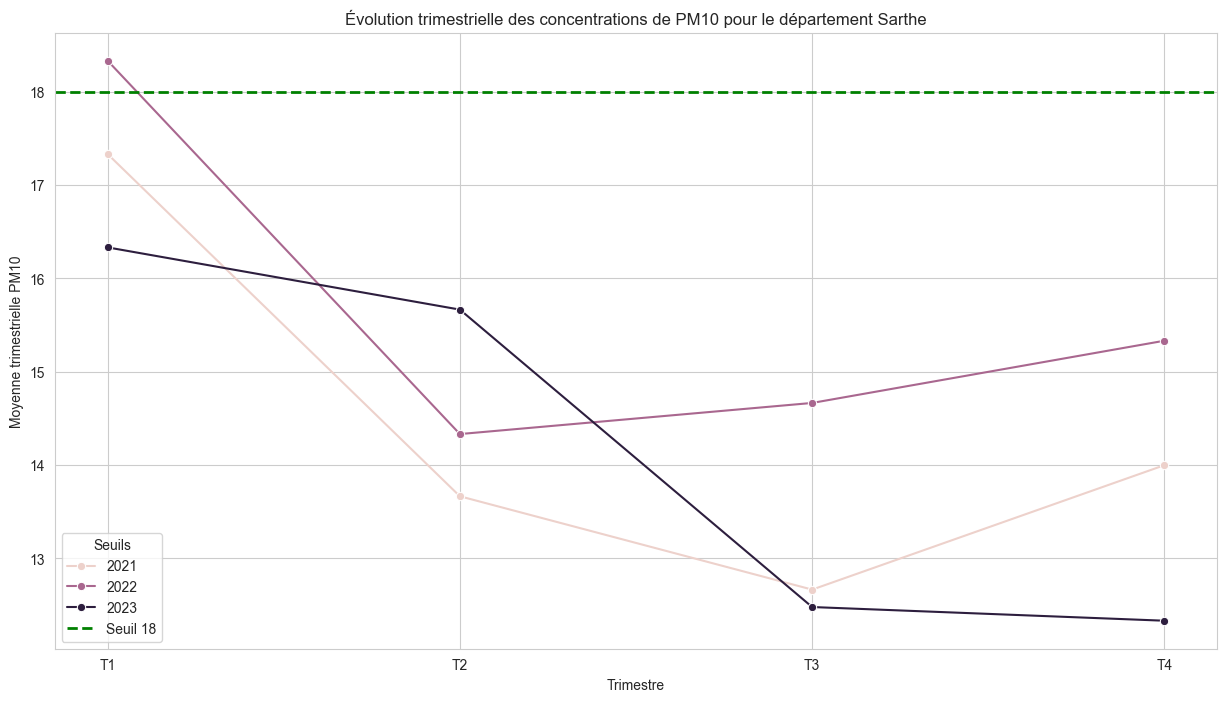

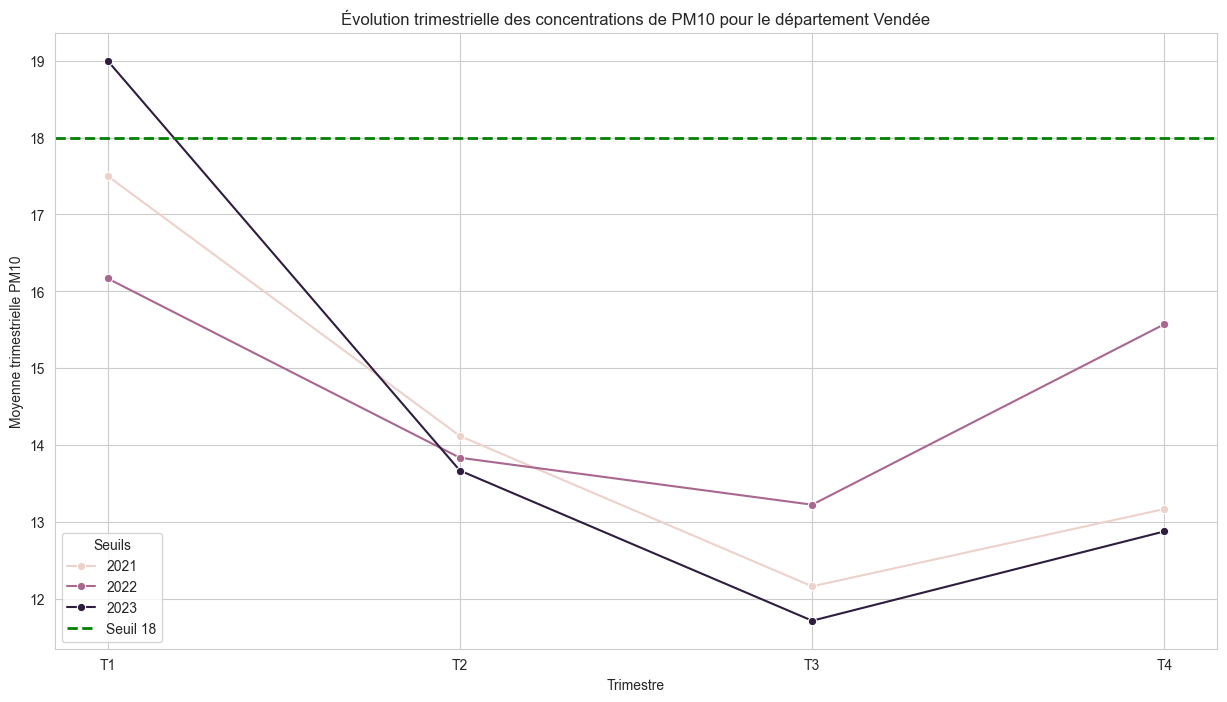

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajouter la colonne "trimestre"
dfPM10['trimestre'] = dfPM10['date_heure_tu'].dt.to_period('Q')

# Calculer les moyennes trimestrielles de PM10
quarterly_means = dfPM10.groupby(['année', 'trimestre', 'departement_nom'])['valeur'].mean().reset_index()

# Convertir la colonne "trimestre" en format lisible
quarterly_means['trimestre'] = quarterly_means['trimestre'].astype(str).str.replace('Q', 'T')

# Ajouter une colonne numérique pour les trimestres
quarterly_means['trimestre_num'] = quarterly_means['trimestre'].str.extract('T([1-4])').astype(int)

# Créer un graphique de séries chronologiques pour chaque département
departments = quarterly_means['departement_nom'].unique()

for department in departments:
    plt.figure(figsize=(15, 8))
    dept_data = quarterly_means[quarterly_means['departement_nom'] == department]
    
    sns.lineplot(data=dept_data, x='trimestre_num', y='valeur', hue='année', marker='o')
    
    plt.axhline(y=OBJECTIF_QUALITE_PM10_MENSUEL, color='green', linestyle='--', linewidth=2, label=f'Seuil {OBJECTIF_QUALITE_PM10_MENSUEL}')
    
    plt.xlabel('Trimestre')
    plt.ylabel('Moyenne trimestrielle PM10')
    plt.title(f'Évolution trimestrielle des concentrations de PM10 pour le département {department}')
    plt.legend(title='Seuils')
    plt.xticks(ticks=[1, 2, 3, 4], labels=['T1', 'T2', 'T3', 'T4'])  # Afficher les trimestres sur l'axe des x
    plt.show()


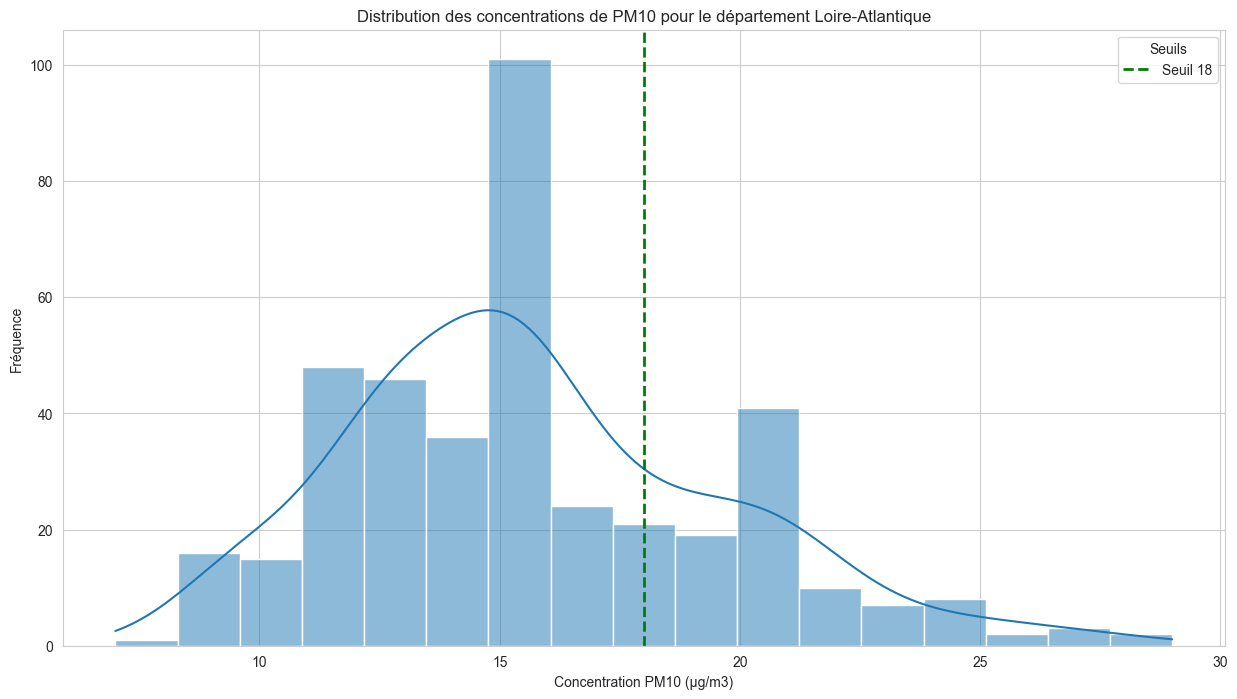

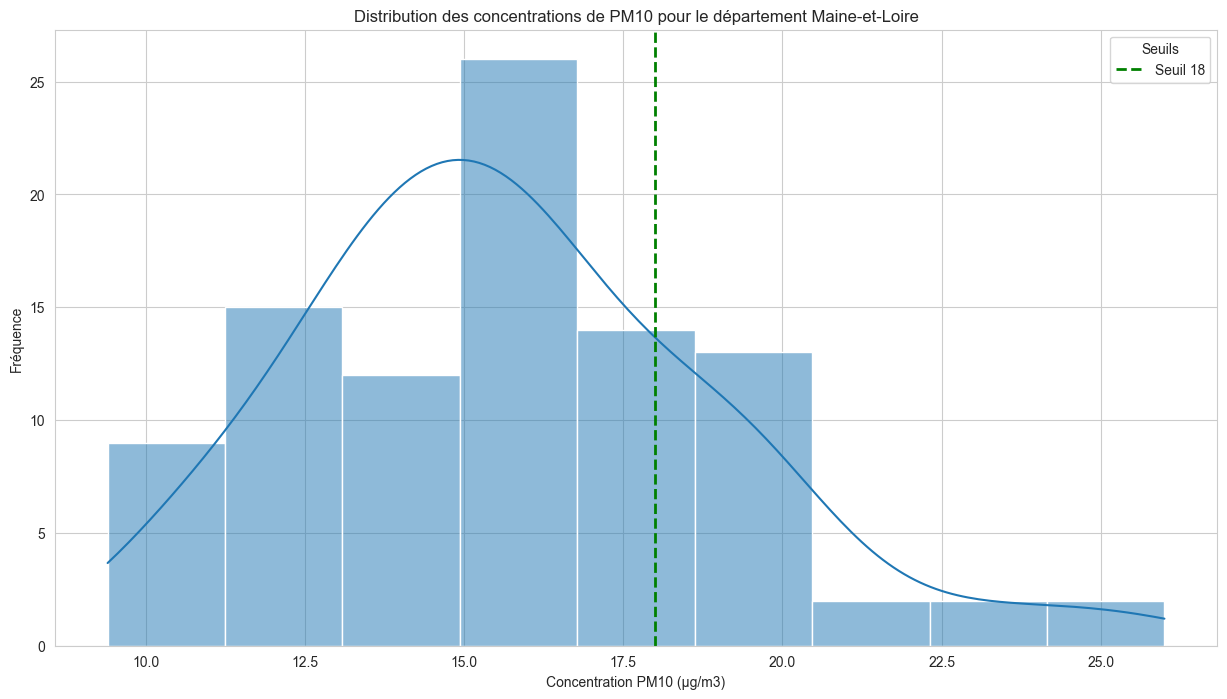

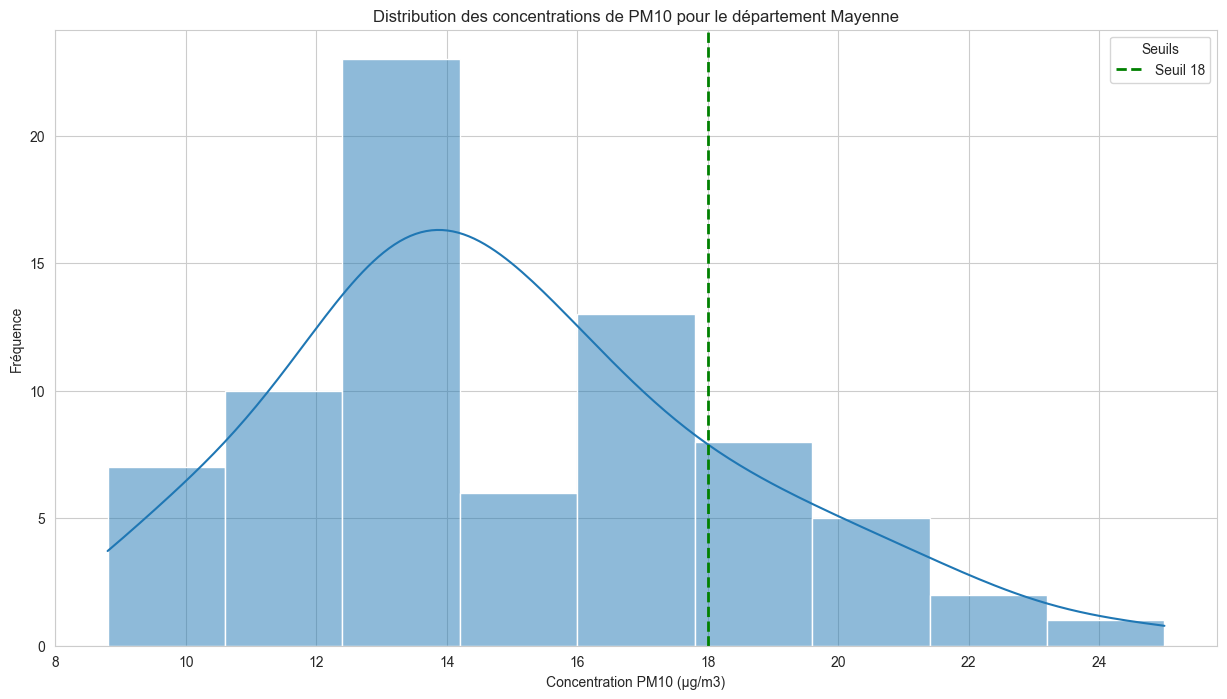

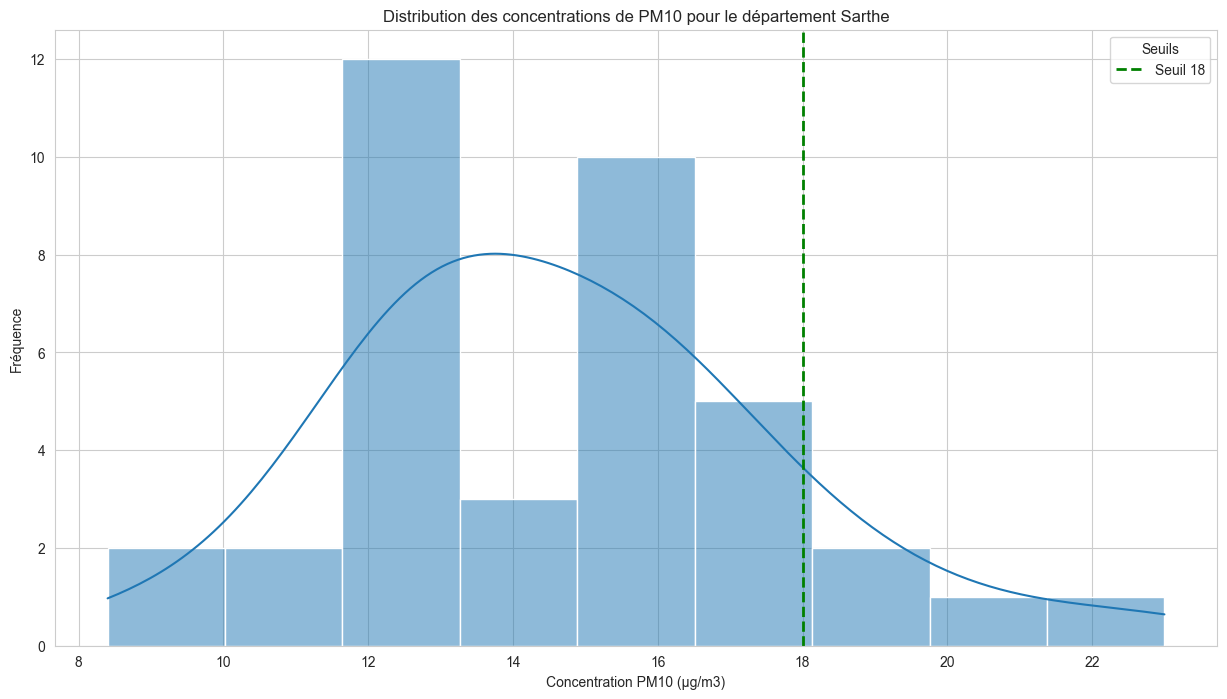

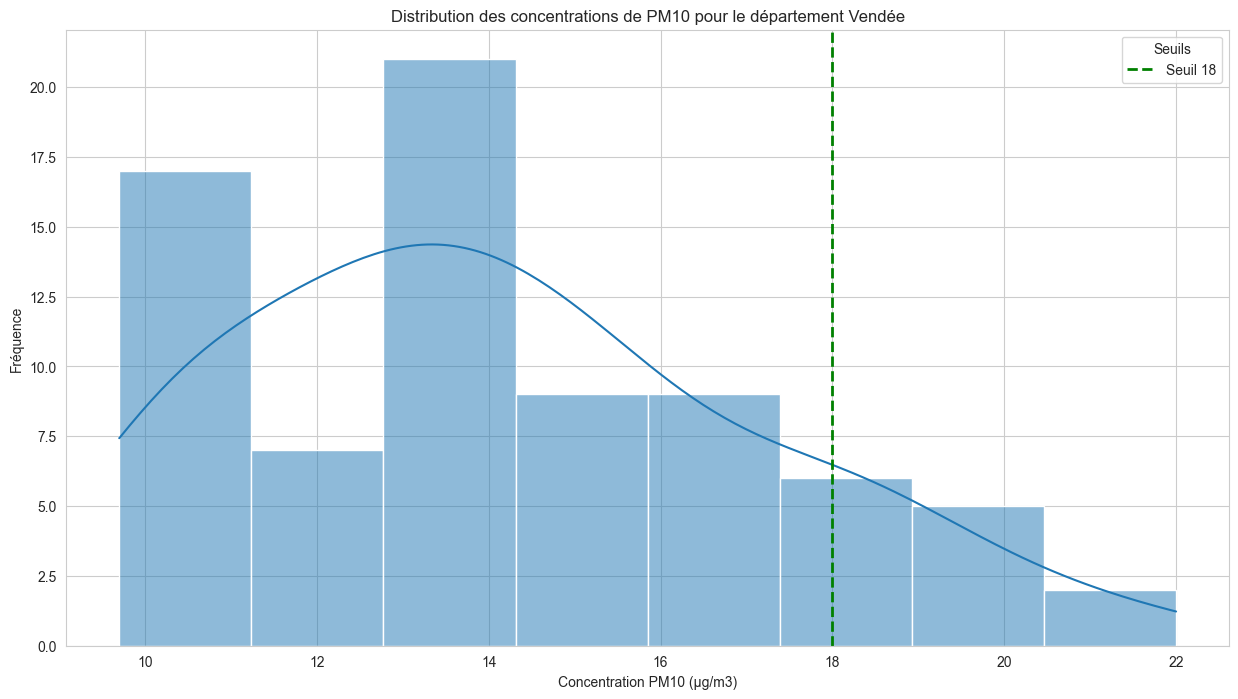

In [68]:
# Créer un histogramme pour chaque département
for department in departments:
    plt.figure(figsize=(15, 8))
    dept_data = dfPM10[dfPM10['departement_nom'] == department]
    
    sns.histplot(dept_data['valeur'], kde=True)
    
    plt.axvline(x=OBJECTIF_QUALITE_PM10_MENSUEL, color='green', linestyle='--', linewidth=2, label=f'Seuil {OBJECTIF_QUALITE_PM10_MENSUEL}')
    
    plt.xlabel('Concentration PM10 (µg/m3)')
    plt.ylabel('Fréquence')
    plt.title(f'Distribution des concentrations de PM10 pour le département {department}')
    plt.legend(title='Seuils')
    plt.show()


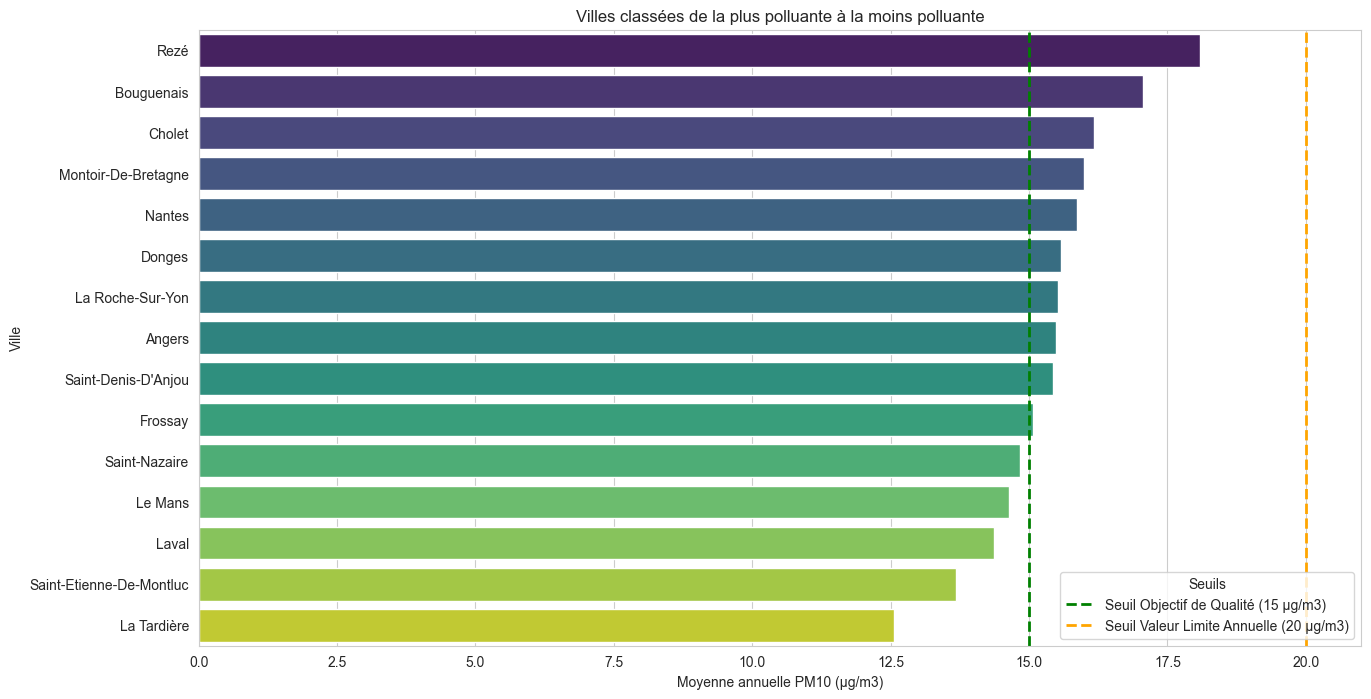

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la moyenne annuelle de PM10 pour chaque ville
city_means = dfPM10.groupby('nom_commune')['valeur'].mean().reset_index()

# Trier les villes de la plus polluante à la moins polluante
city_means = city_means.sort_values(by='valeur', ascending=False)

# Créer un graphique en bâtons pour les villes
plt.figure(figsize=(15, 8))
sns.barplot(data=city_means, x='valeur', y='nom_commune', hue='nom_commune', dodge=False, palette='viridis', legend=False)

# Ajouter des lignes verticales pour les seuils
plt.axvline(x=OBJECTIF_QUALITE_PM10, color='green', linestyle='--', linewidth=2, label=f'Seuil Objectif de Qualité ({OBJECTIF_QUALITE_PM10} µg/m3)')
plt.axvline(x=VALEUR_LIMITE_ANNUELLE_PM10, color='orange', linestyle='--', linewidth=2, label=f'Seuil Valeur Limite Annuelle ({VALEUR_LIMITE_ANNUELLE_PM10} µg/m3)')

plt.xlabel('Moyenne annuelle PM10 (µg/m3)')
plt.ylabel('Ville')
plt.title('Villes classées de la plus polluante à la moins polluante')
plt.legend(title='Seuils')
plt.show()


## Fusion des données avec le jeux de données dfPopulation

In [39]:
# Importer la fonction depuis le fichier Python
from population import fetch_and_process_population_data

# Utilisation de la fonction importée
base_url = "https://data.paysdelaloire.fr/api/explore/v2.1/catalog/datasets/12002701600563_population_pays_de_la_loire_2019_communes_epci/records"
dfPopulation = fetch_and_process_population_data(base_url)

# Afficher les premières lignes du DataFrame dfPopulation pour vérifier les modifications
print(dfPopulation.head())

# Afficher les types de colonnes pour vérifier les conversions
print(dfPopulation.dtypes)

Total records retrieved: 1238
   code_region  nom_de_la_region  code_departement  code_arrondissement  \
0           52  Pays de la Loire                44                    3   
1           52  Pays de la Loire                44                    2   
2           52  Pays de la Loire                44                    3   
3           52  Pays de la Loire                44                    2   
4           52  Pays de la Loire                44                    3   

   code_canton  code_commune nom_de_la_commune  population_municipale  \
0            9         44006           Assérac                 1790.0   
1           21         44018            Bouaye                 7844.0   
2           89         44005   Chaumes-en-Retz                 6759.0   
3           24         44047           Couëron                21372.0   
4            2         44049        Le Croisic                 4093.0   

   population_comptee_a_part  population_totale  \
0                       32.0 

In [42]:
# Fusionner les deux DataFrames en utilisant les colonnes 'nom_commune' et 'nom_de_la_commune' avec une jointure externe gauche
if 'nom_commune' in dfPM10.columns and 'nom_de_la_commune' in dfPopulation.columns:
    dfMerged = pd.merge(dfPM10, dfPopulation, left_on='nom_commune', right_on='nom_de_la_commune', how='left', suffixes=('_pm10', '_pop'))
    
    # Sauvegarder le DataFrame fusionné pour utilisation ultérieure
    dfMerged.to_pickle('MergedData.pkl')

    # Afficher les premières lignes du DataFrame fusionné
    print("dfMerged:")
    print(dfMerged.head())
else:
    print("Les colonnes de fusion 'nom_commune' et 'nom_de_la_commune' ne sont pas présentes dans les DataFrames. Vérifiez les colonnes disponibles.")

# Charger le DataFrame depuis le fichier sauvegardé
dfPM10 = pd.read_pickle('MergedData.pkl')

# Afficher les types de chaque colonne
print(dfPM10.dtypes)

dfMerged:
                                  id code_polluant code_point_de_prelevement  \
0  2023-12-01 00:00:00FR23003_PM10_1            24              FR23003_PM10   
1  2023-12-01 00:00:00FR23068_PM10_4            24              FR23068_PM10   
2  2023-12-01 00:00:00FR23070_PM10_3            24              FR23070_PM10   
3  2023-12-01 00:00:00FR23078_PM10_2            24              FR23078_PM10   
4  2023-12-01 00:00:00FR23107_PM10_4            24              FR23107_PM10   

  code_station               nom_station               nom_commune  \
0      FR23003              LA MEGRETAIS                    Donges   
1      FR23068                   FROSSAY                   Frossay   
2      FR23070  SAINT ETIENNE DE MONTLUC  Saint-Etienne-De-Montluc   
3      FR23078             SAINT EXUPERY                    Cholet   
4      FR23107            LA CHAUVINIERE                    Nantes   

   code_commune_pm10  departement_code   departement_nom  code_zone_affichage  \
0      

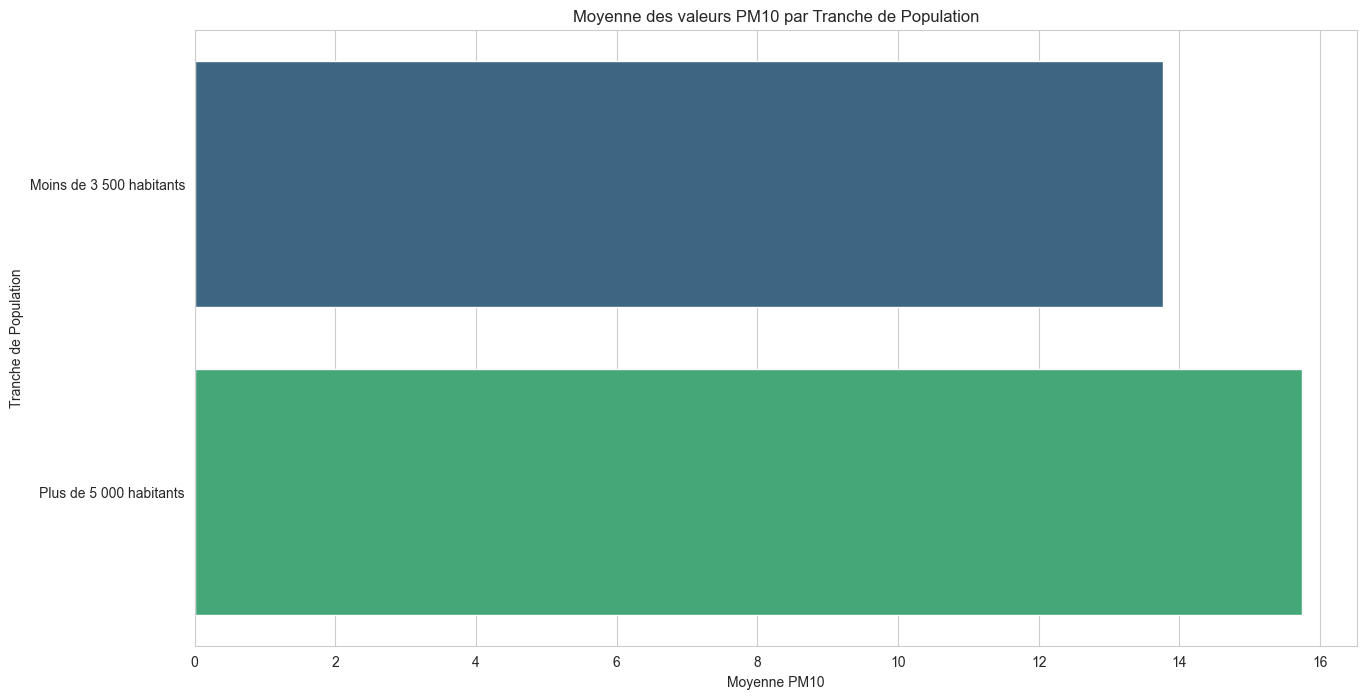

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifier si la colonne 'tranche_population' existe
if 'tranche_population' in dfPM10.columns:
    # Calculer la moyenne de PM10 pour chaque tranche de population
    population_means = dfPM10.groupby('tranche_population')['valeur'].mean().reset_index()

    # Trier les tranches de population pour un affichage ordonné
    population_means = population_means.sort_values('tranche_population')

    # Créer un graphique en barres
    plt.figure(figsize=(15, 8))
    sns.barplot(data=population_means, x='valeur', y='tranche_population', palette='viridis', hue='tranche_population', dodge=False, legend=False)

    plt.xlabel('Moyenne PM10')
    plt.ylabel('Tranche de Population')
    plt.title('Moyenne des valeurs PM10 par Tranche de Population')
    plt.show()
else:
    print("La colonne 'tranche_population' n'existe pas dans le DataFrame.")


## Ajout d'alerte quand les variables de seuils sont dépassées

### Pour les valeurs de seuils annuels


In [47]:
# Convertir les colonnes de date en format datetime si ce n'est pas déjà fait
dfPM10['date_heure_tu'] = pd.to_datetime(dfPM10['date_heure_tu'])

# Grouper les données par année et département
dfPM10['année'] = dfPM10['date_heure_tu'].dt.year
grouped = dfPM10.groupby(['année', 'departement_nom'])[['valeur']].mean().reset_index()

# Arrondir les valeurs moyennes à un chiffre après la virgule
grouped['valeur'] = grouped['valeur'].round(1)

# Créer la colonne indiquant si la moyenne annuelle dépasse un des seuils
grouped['depasse_objectif_qualite'] = grouped['valeur'] > OBJECTIF_QUALITE_PM10
grouped['depasse_valeur_limite'] = grouped['valeur'] > VALEUR_LIMITE_ANNUELLE_PM10

# Regrouper les alertes par type
alertes_qualite = grouped[grouped['depasse_objectif_qualite']]
alertes_limite = grouped[grouped['depasse_valeur_limite']]

# Afficher les alertes par type pour les moyennes annuelles avec le département
if not alertes_qualite.empty:
    print("Alertes pour l'Objectif de Qualité annuel:")
    for index, row in alertes_qualite.iterrows():
        print(f"Alerte: Valeur moyenne annuelle {row['valeur']} dépasse l'Objectif de Qualité annuel ({OBJECTIF_QUALITE_PM10} µg/m3) en {row['année']} dans le département {row['departement_nom']}")
else:
    print("Aucune alerte pour l'Objectif de Qualité annuel.")

if not alertes_limite.empty:
    print("\nAlertes pour la Valeur Limite annuelle:")
    for index, row in alertes_limite.iterrows():
        print(f"Alerte: Valeur moyenne annuelle {row['valeur']} dépasse la Valeur Limite annuelle ({VALEUR_LIMITE_ANNUELLE_PM10} µg/m3) en {row['année']} dans le département {row['departement_nom']}")
else:
    print("Aucune alerte pour la Valeur Limite annuelle.")



Alertes pour l'Objectif de Qualité annuel:
Alerte: Valeur moyenne annuelle 15.8 dépasse l'Objectif de Qualité annuel (15 µg/m3) en 2021 dans le département Loire-Atlantique
Alerte: Valeur moyenne annuelle 15.1 dépasse l'Objectif de Qualité annuel (15 µg/m3) en 2021 dans le département Maine-et-Loire
Alerte: Valeur moyenne annuelle 15.8 dépasse l'Objectif de Qualité annuel (15 µg/m3) en 2021 dans le département Mayenne
Alerte: Valeur moyenne annuelle 16.1 dépasse l'Objectif de Qualité annuel (15 µg/m3) en 2022 dans le département Loire-Atlantique
Alerte: Valeur moyenne annuelle 16.6 dépasse l'Objectif de Qualité annuel (15 µg/m3) en 2022 dans le département Maine-et-Loire
Alerte: Valeur moyenne annuelle 15.3 dépasse l'Objectif de Qualité annuel (15 µg/m3) en 2022 dans le département Mayenne
Alerte: Valeur moyenne annuelle 15.7 dépasse l'Objectif de Qualité annuel (15 µg/m3) en 2022 dans le département Sarthe
Alerte: Valeur moyenne annuelle 15.1 dépasse l'Objectif de Qualité annuel (15 µ

### Pour les valeurs de seuils mensuels


In [48]:
import pandas as pd
import calendar

# Convertir les colonnes de date en format datetime si ce n'est pas déjà fait
dfPM10['date_heure_tu'] = pd.to_datetime(dfPM10['date_heure_tu'])

# Grouper les données par année, mois et département
dfPM10['année'] = dfPM10['date_heure_tu'].dt.year
dfPM10['mois'] = dfPM10['date_heure_tu'].dt.month
grouped = dfPM10.groupby(['année', 'mois', 'departement_nom'])[['valeur']].mean().reset_index()

# Arrondir les valeurs moyennes à un chiffre après la virgule
grouped['valeur'] = grouped['valeur'].round(1)

# Créer la colonne indiquant si la moyenne mensuelle dépasse le seuil
grouped['depasse_objectif_qualite'] = grouped['valeur'] > OBJECTIF_QUALITE_PM10_MENSUEL

# Extraire les mois en lettres
grouped['mois_lettres'] = grouped['mois'].apply(lambda x: calendar.month_name[x])

# Regrouper les alertes par type
alertes_qualite = grouped[grouped['depasse_objectif_qualite']]

# Afficher les alertes par type pour les moyennes mensuelles avec le département
if not alertes_qualite.empty:
    print("Alertes pour l'Objectif de Qualité mensuel:")
    for index, row in alertes_qualite.iterrows():
        print(f"Alerte: Valeur moyenne {row['valeur']} dépasse l'Objectif de Qualité mensuel ({OBJECTIF_QUALITE_PM10_MENSUEL} µg/m3) en {row['mois_lettres']} {row['année']} dans le département {row['departement_nom']}")
else:
    print("Aucune alerte pour l'Objectif de Qualité mensuel.")


Alertes pour l'Objectif de Qualité mensuel:
Alerte: Valeur moyenne 20.2 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en January 2021 dans le département Loire-Atlantique
Alerte: Valeur moyenne 19.0 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en January 2021 dans le département Mayenne
Alerte: Valeur moyenne 18.5 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en February 2021 dans le département Loire-Atlantique
Alerte: Valeur moyenne 19.0 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en February 2021 dans le département Mayenne
Alerte: Valeur moyenne 21.3 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en March 2021 dans le département Loire-Atlantique
Alerte: Valeur moyenne 20.5 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en March 2021 dans le département Maine-et-Loire
Alerte: Valeur moyenne 20.0 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en March 2021 dans le département Mayenne
Alerte: Valeur moyenne 19.0 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en